<div class="alert alert-block alert-success" style="font-size: 20px"> <b>Example of experiments with different metaheuristics for optimisation of continuous problems</b></div>

<div class="alert alert-block alert-success" style="font-size: 16px"> Specification of the parameters used in the simulation</div>

In [1]:
from aux_functions import *

In [2]:
problem_dim = 100
problem = "Sphere"

tw_size=10
num_iter = 500
num_executions = 30
population_size = 100
algorithms = ["GPSO", "LPSO", "ABC", "DE", "GA", "CSO"]

In [3]:
# Directory to the simulation output files
output_dir = "C:/Users/clodomir/Documents/GitHub/INs/results"
# Directury to save the results of this notebook
processed_results_dir = output_dir + "/processed/continuous"

if not os.path.isdir(processed_results_dir):
    os.makedirs(processed_results_dir)

<div class="alert alert-block alert-success" style="font-size: 16px"> Loading the network files</div>

In [4]:
networks_per_tw_dict = load_alg_network(algorithms, population_size, num_iter, num_executions, problem, 
                                        problem_dim, tw_size, output_dir)
networks_per_tw_dict.keys()

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

dict_keys(['GPSO', 'LPSO', 'ABC', 'DE', 'GA', 'CSO'])

<div class="alert alert-block alert-success" style="font-size: 16px"> Exporting and ploting some examples of network</div>

  0%|          | 0/6 [00:00<?, ?it/s]

GPSO


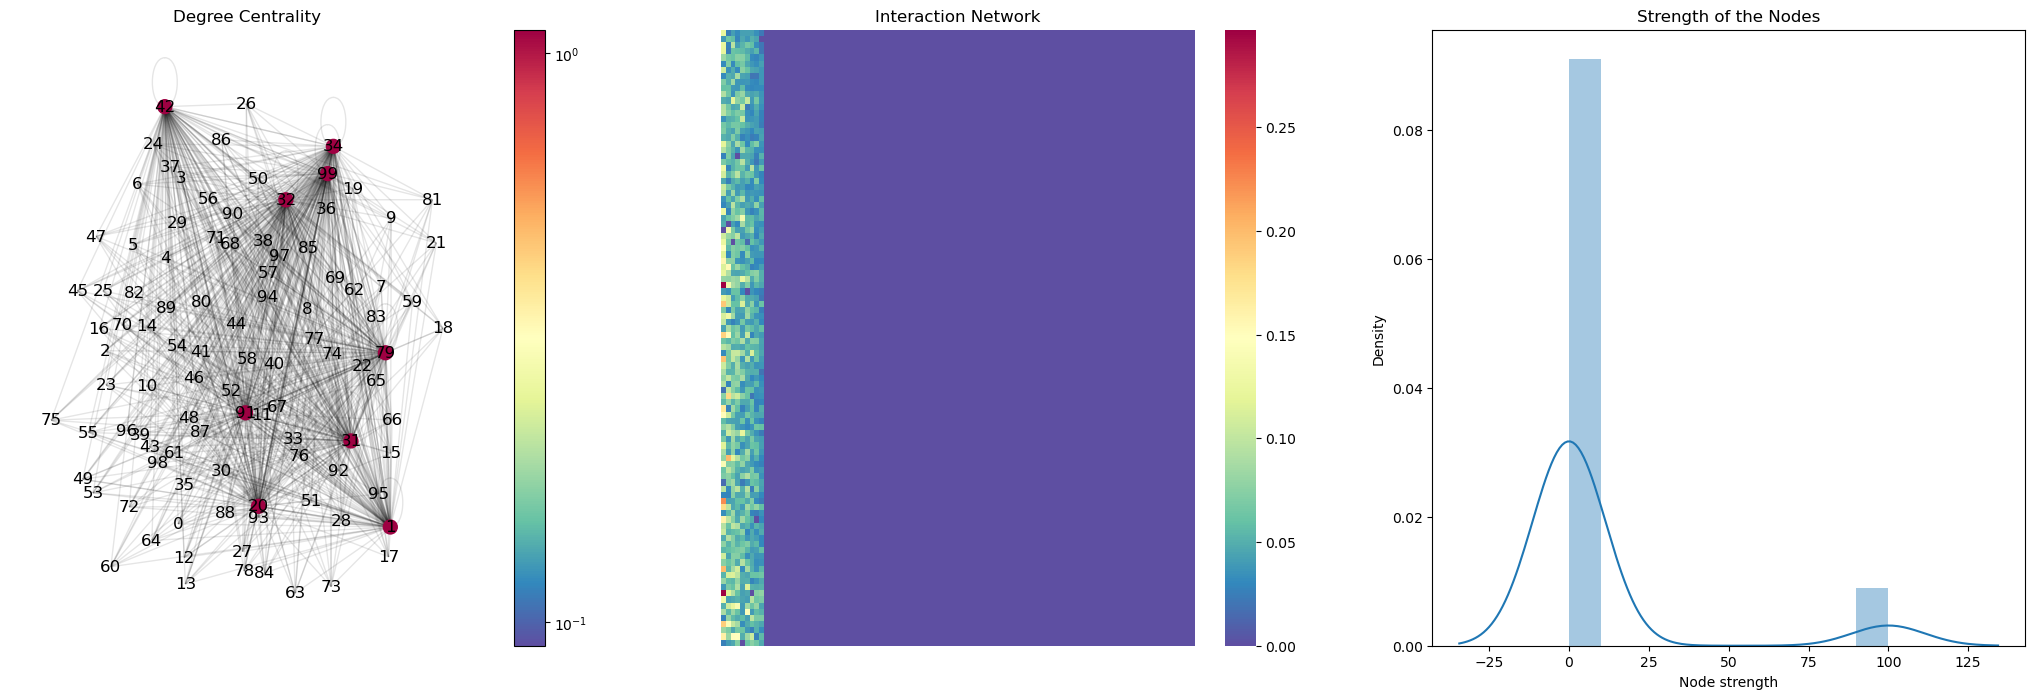

LPSO


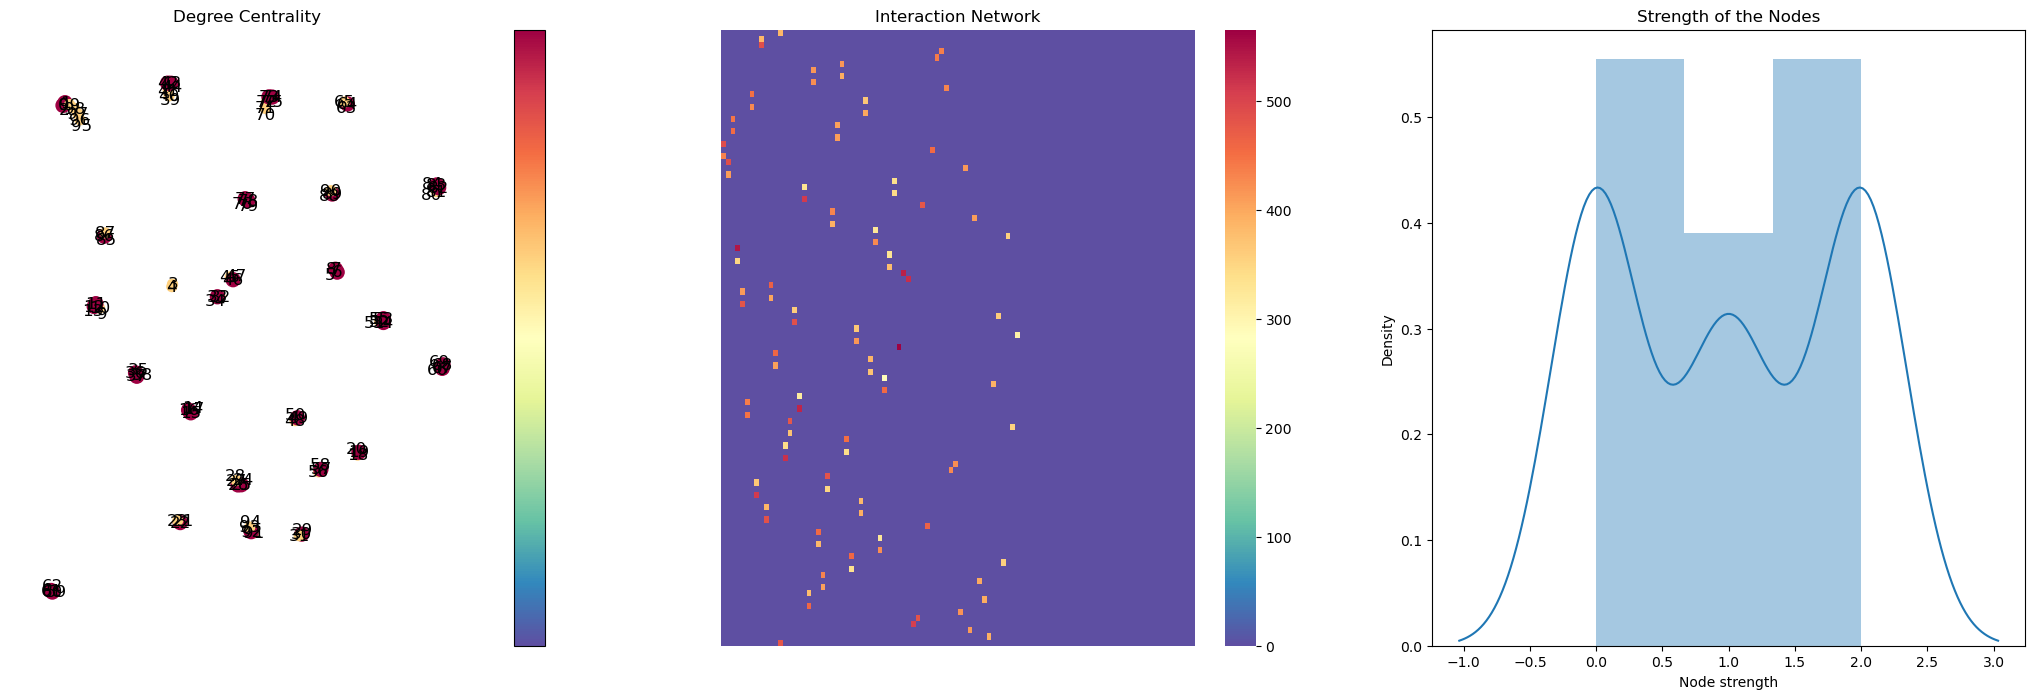

ABC


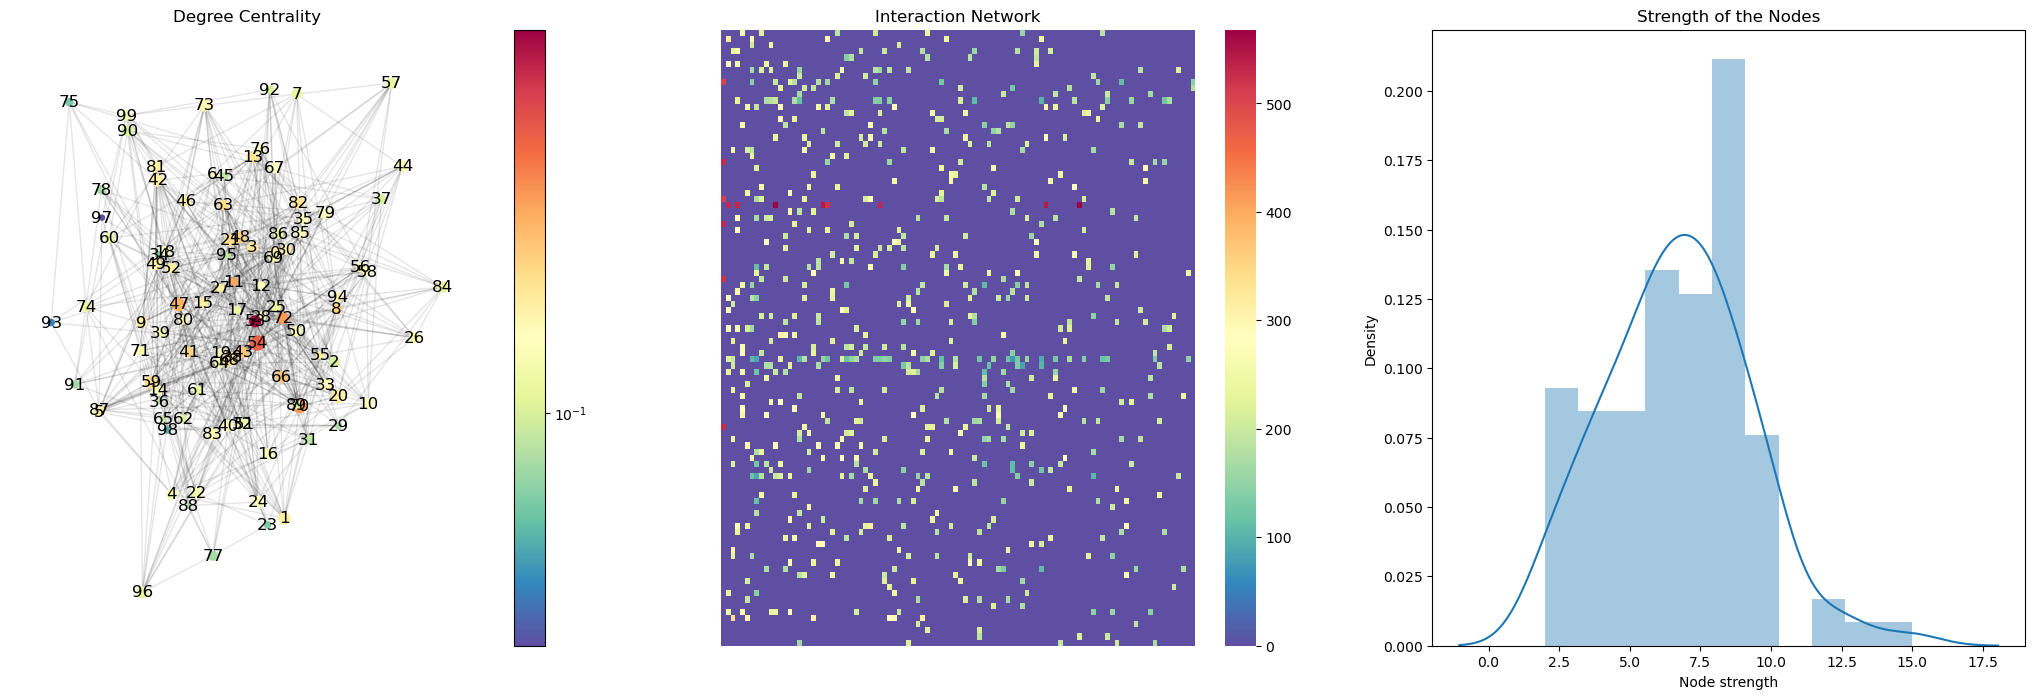

DE


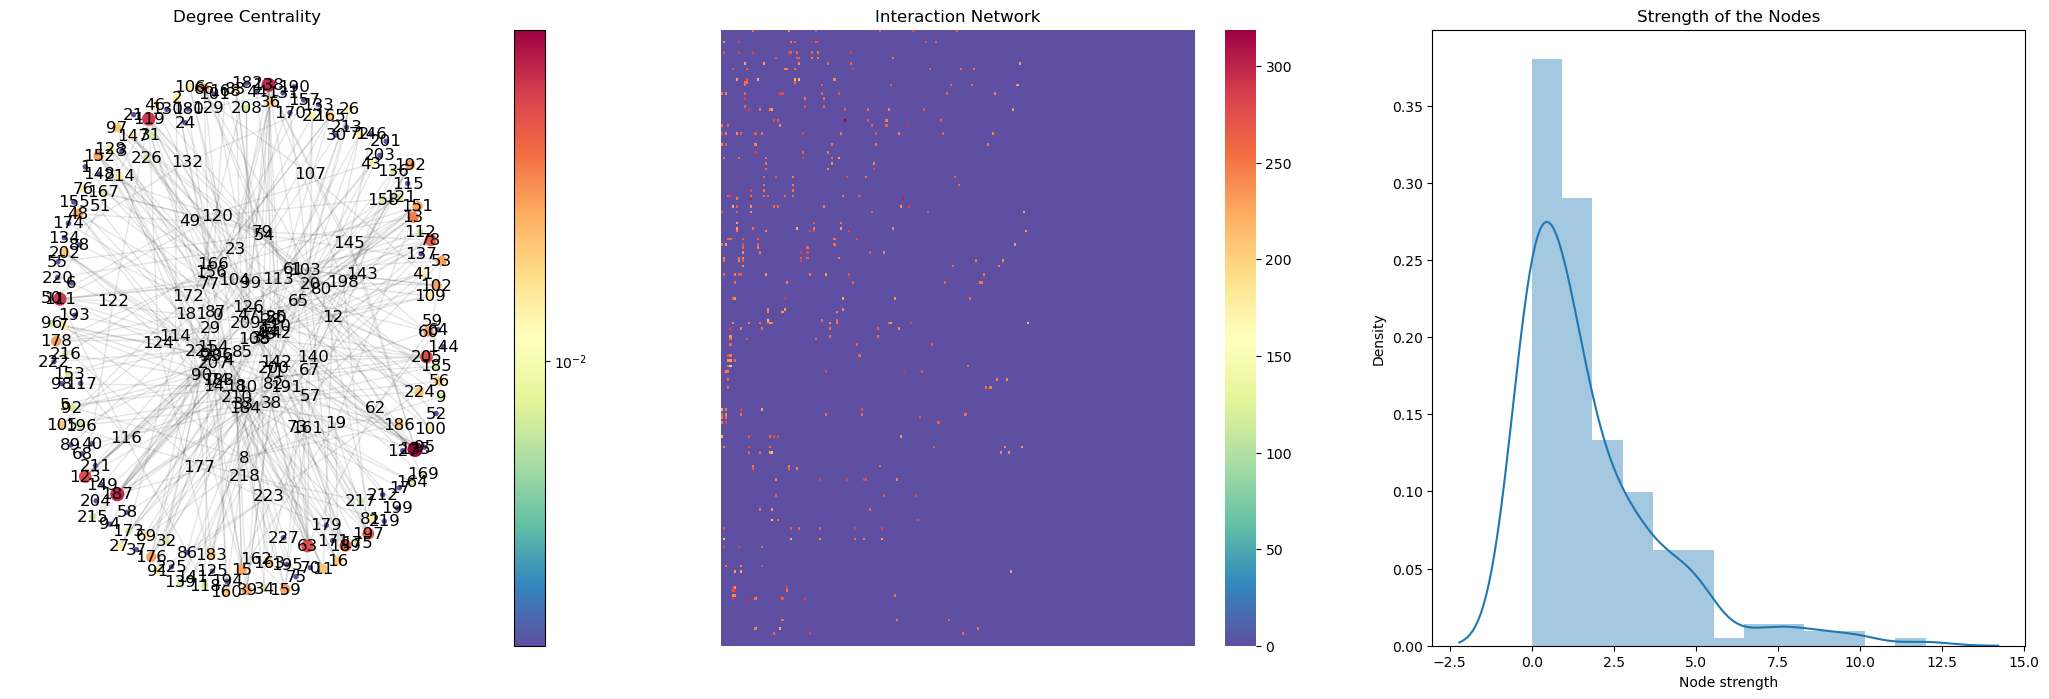

GA


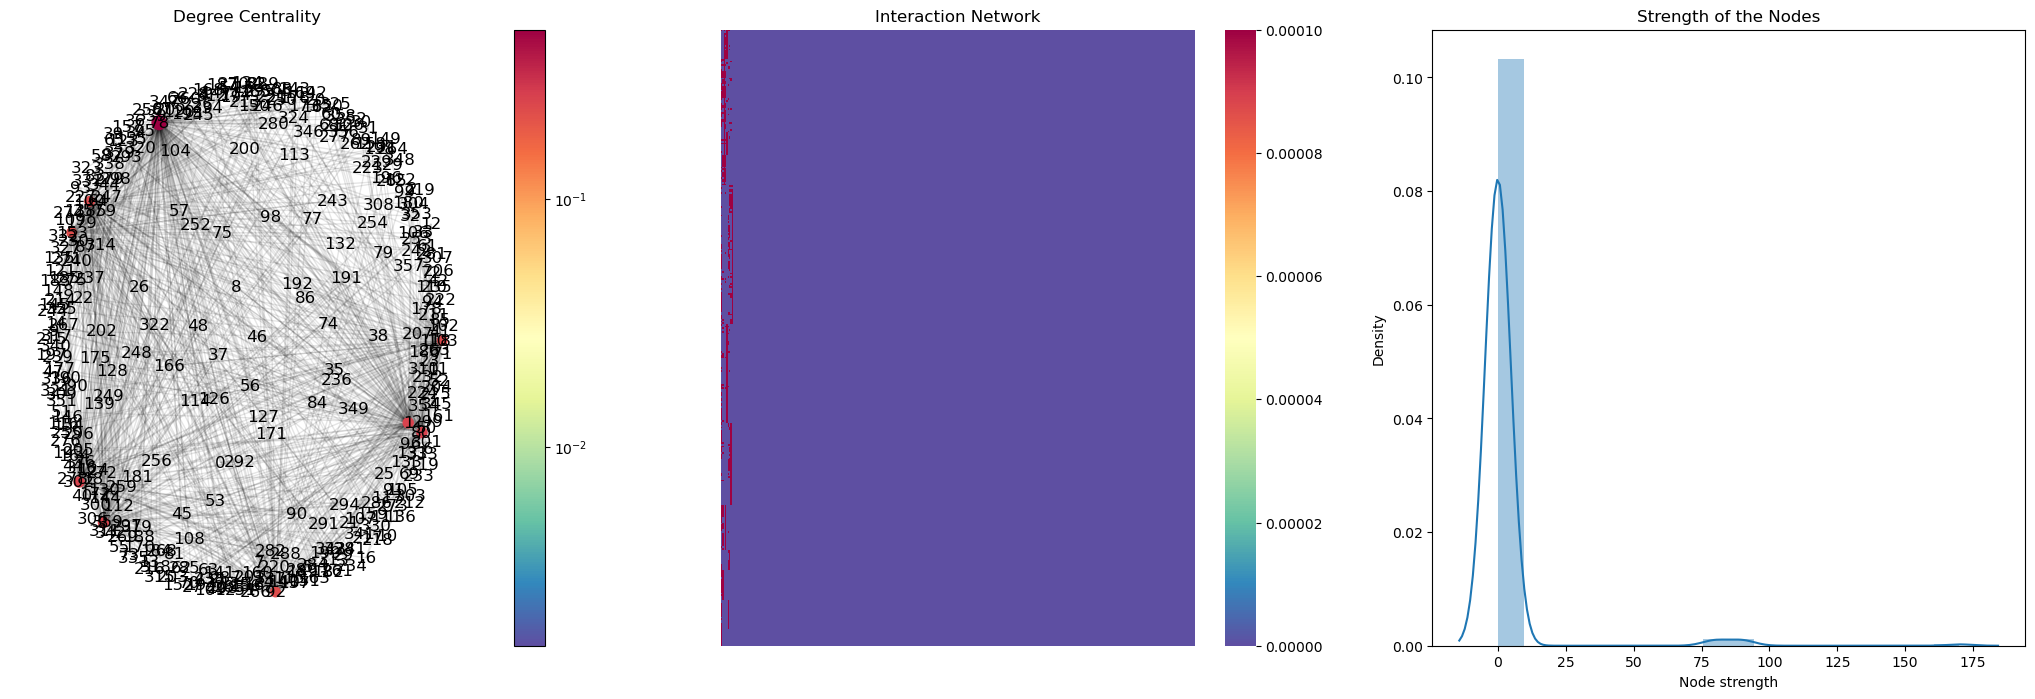

CSO


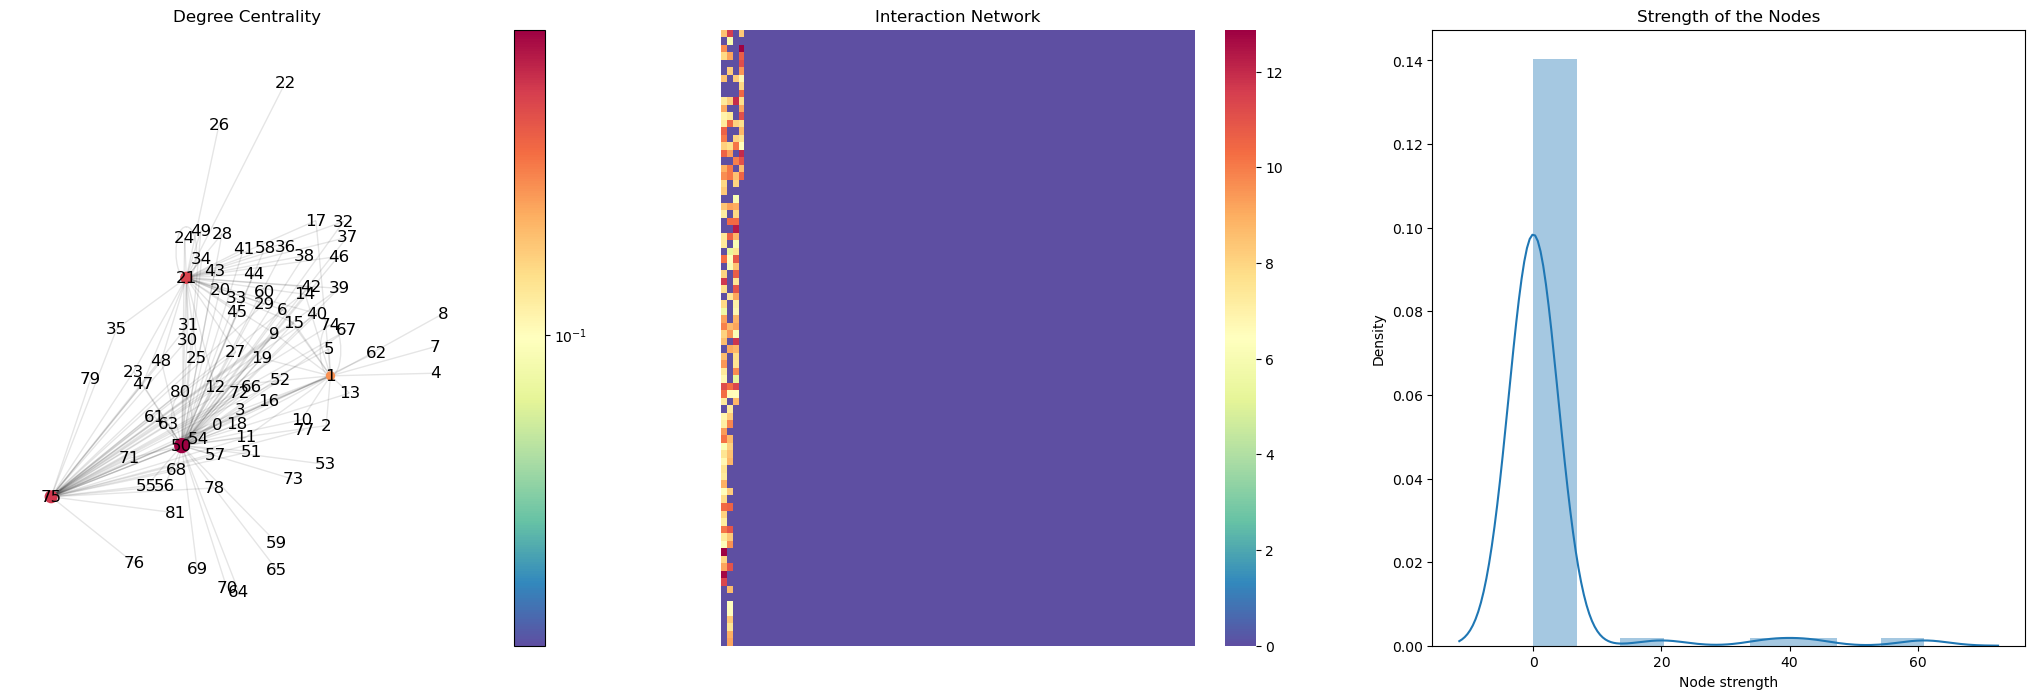

In [5]:
for alg_name, data in tqdm(networks_per_tw_dict.items(), leave=False):
    for exec_, networks in data.items():
        for tw_, net in networks.items():
            file_name = '/{}_{}_tw_size{}_tw{}_ex{}.gml'.format(alg_name, problem, tw_size, tw_, exec_)
            nx.write_gml(net, processed_results_dir + file_name)
    plot_sample_network(alg_name, net)

<div class="alert alert-block alert-success" style="font-size: 16px"> Using PD to compare different executions</div>

  0%|          | 0/6 [00:00<?, ?it/s]

GPSO_GPSO


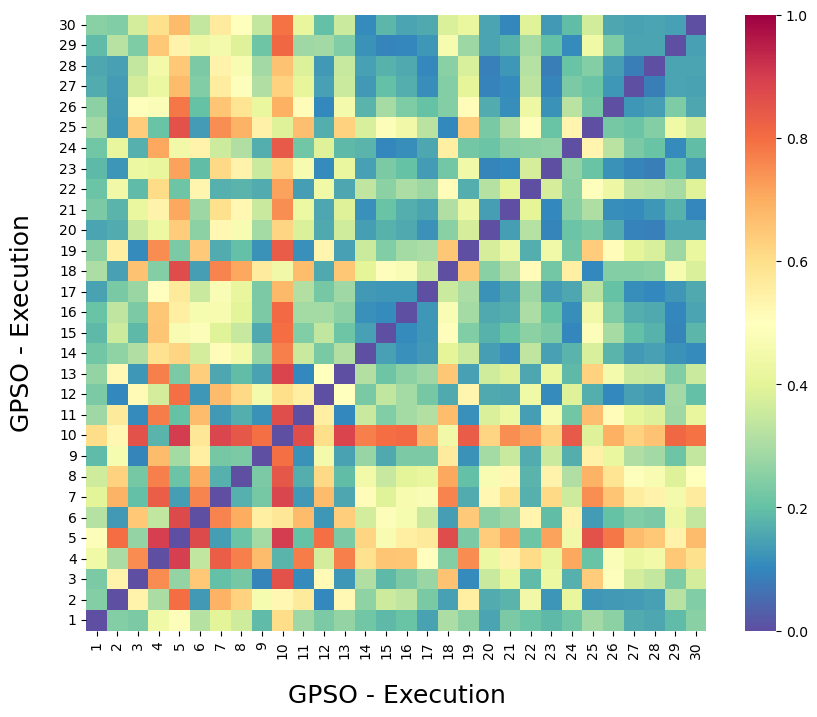

LPSO_LPSO


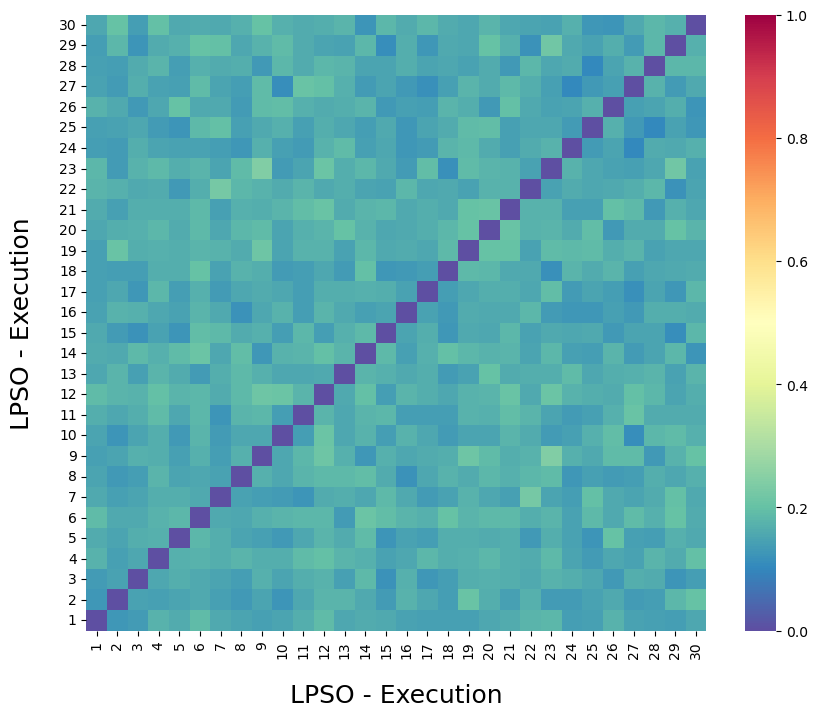

ABC_ABC


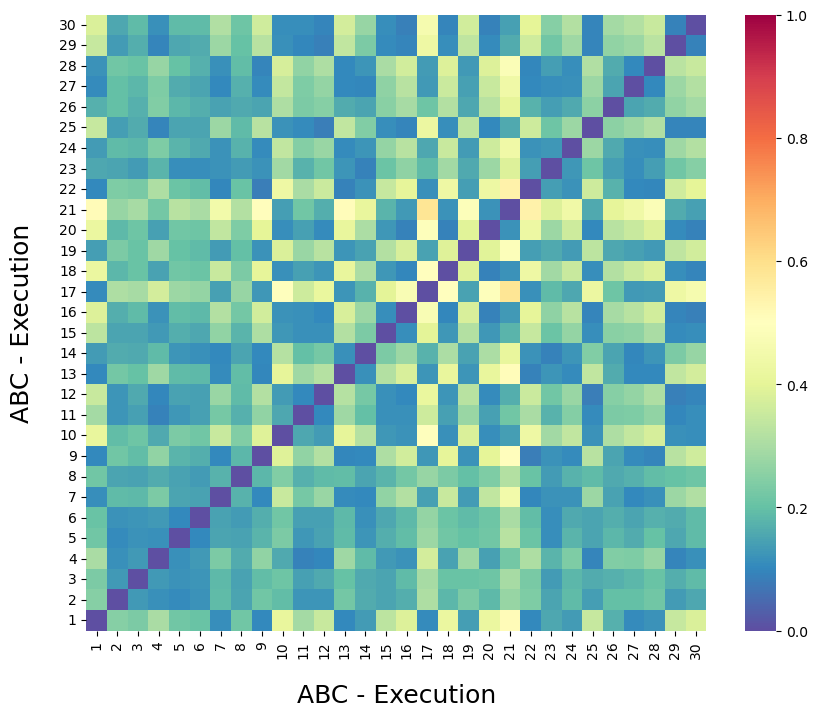

DE_DE


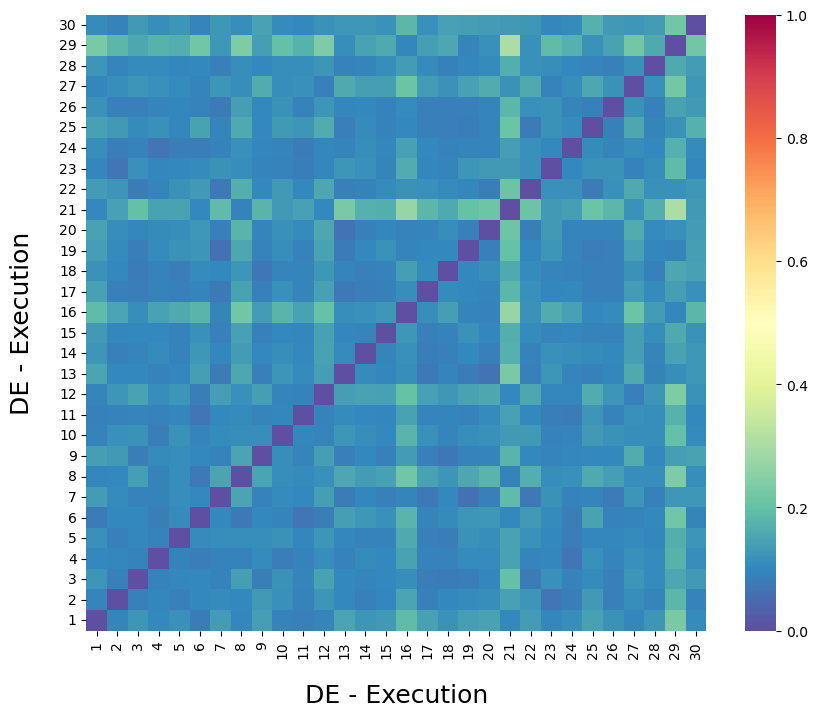

GA_GA


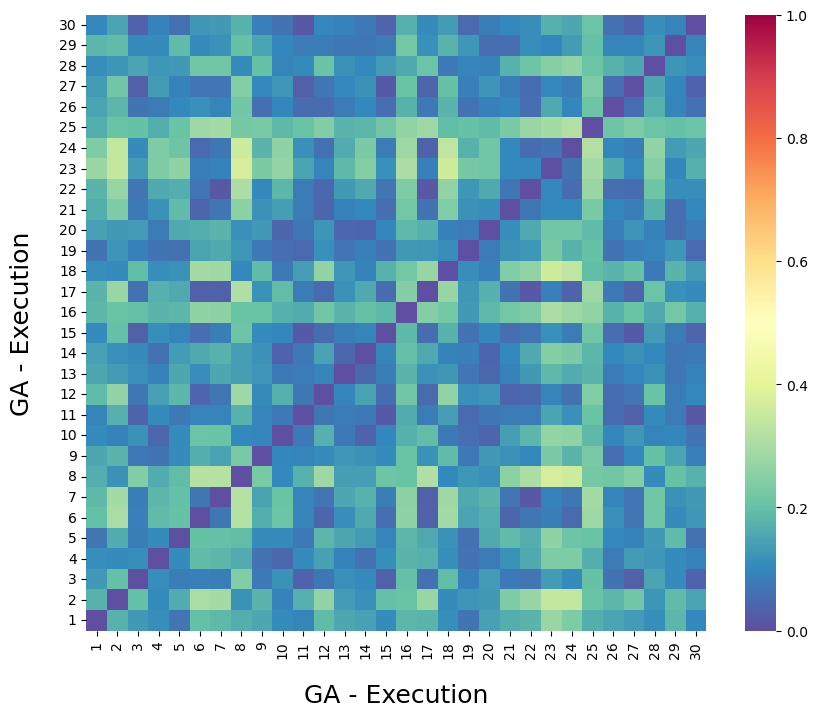

CSO_CSO


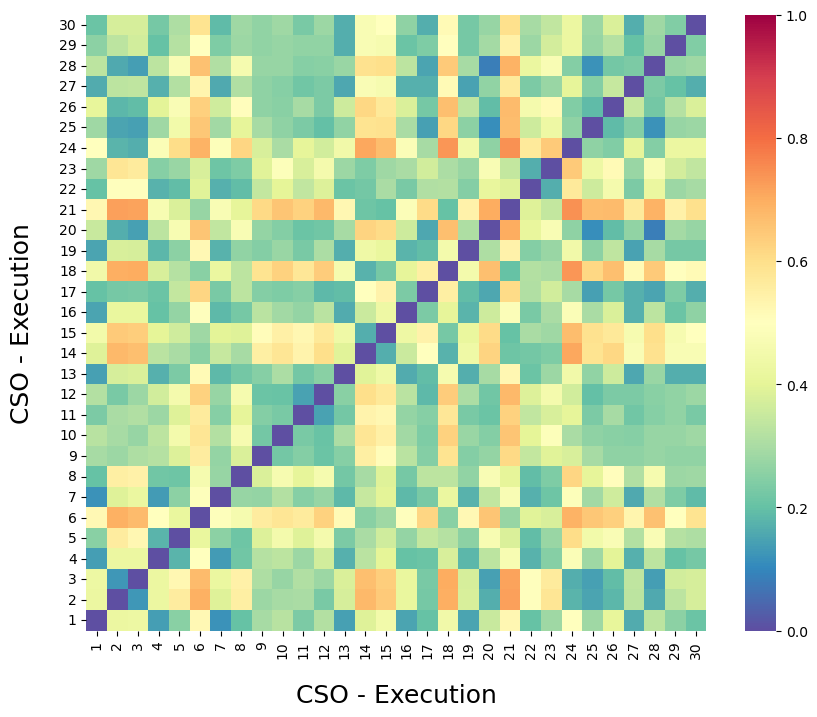

In [6]:
for alg_name1, data1 in tqdm(networks_per_tw_dict.items(), leave=False):
    plot_matrix_exec((alg_name1, data1), (alg_name1, data1), "_".join([str(alg_name1), str(alg_name1)]), processed_results_dir)

<div class="alert alert-block alert-success" style="font-size: 16px"> Using PD to compare different time windows</div>

  0%|          | 0/6 [00:00<?, ?it/s]

GPSO GPSO


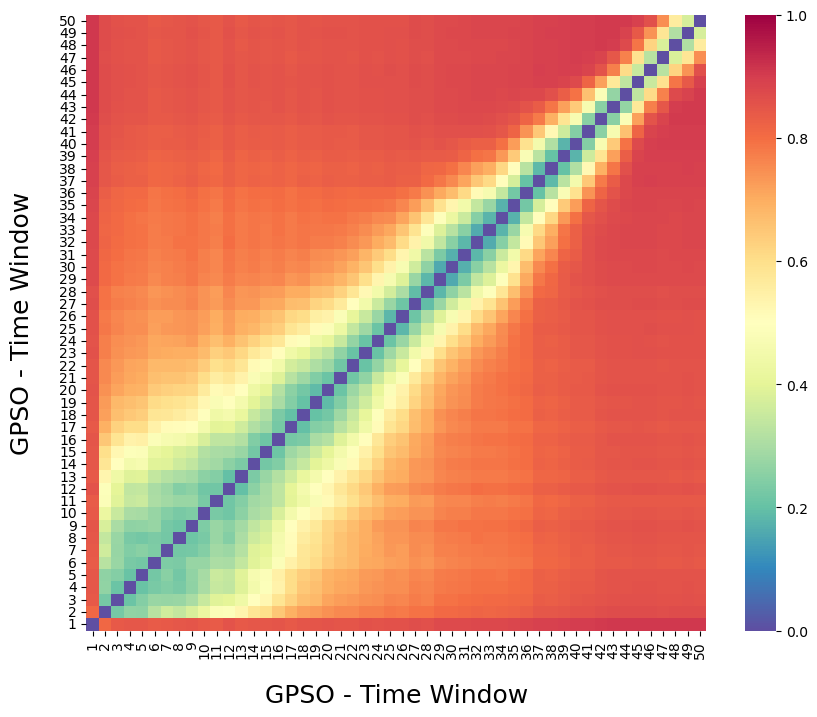

LPSO LPSO


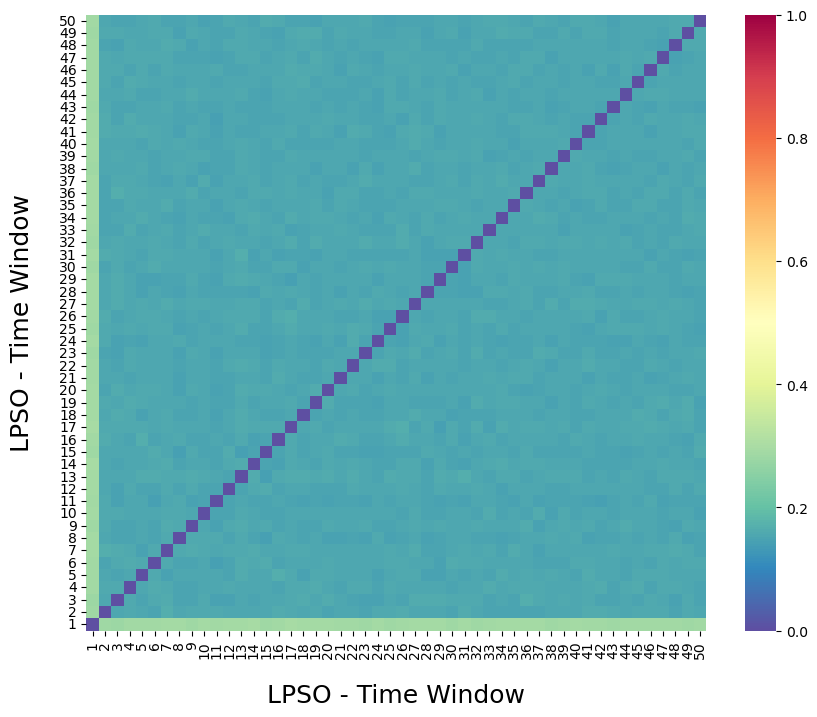

ABC ABC


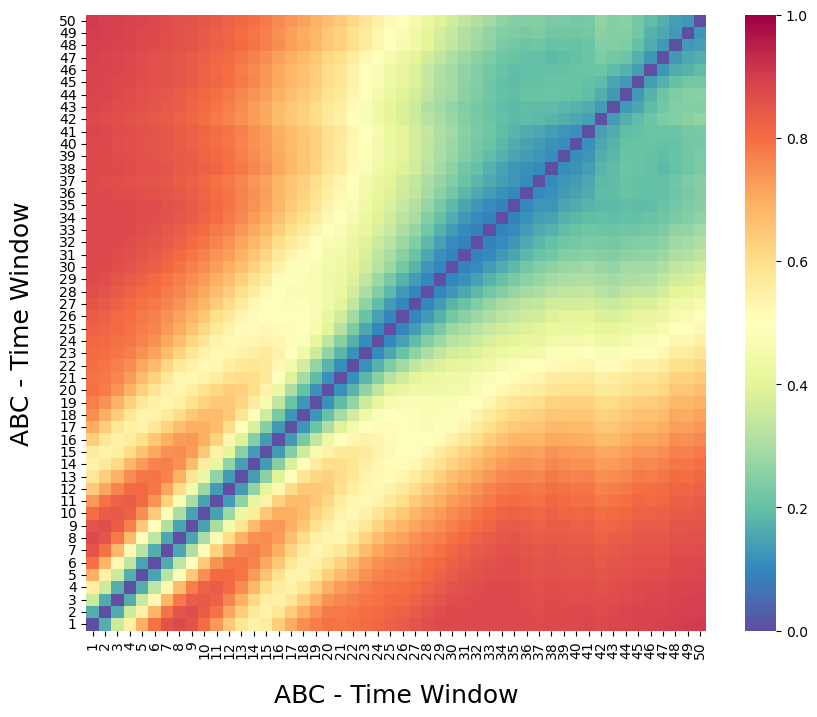

DE DE


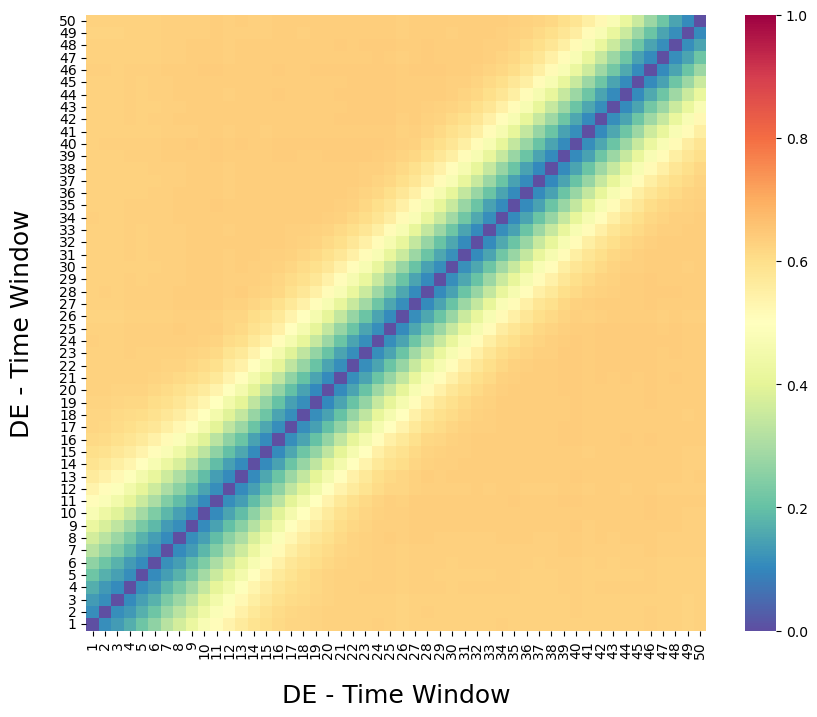

GA GA


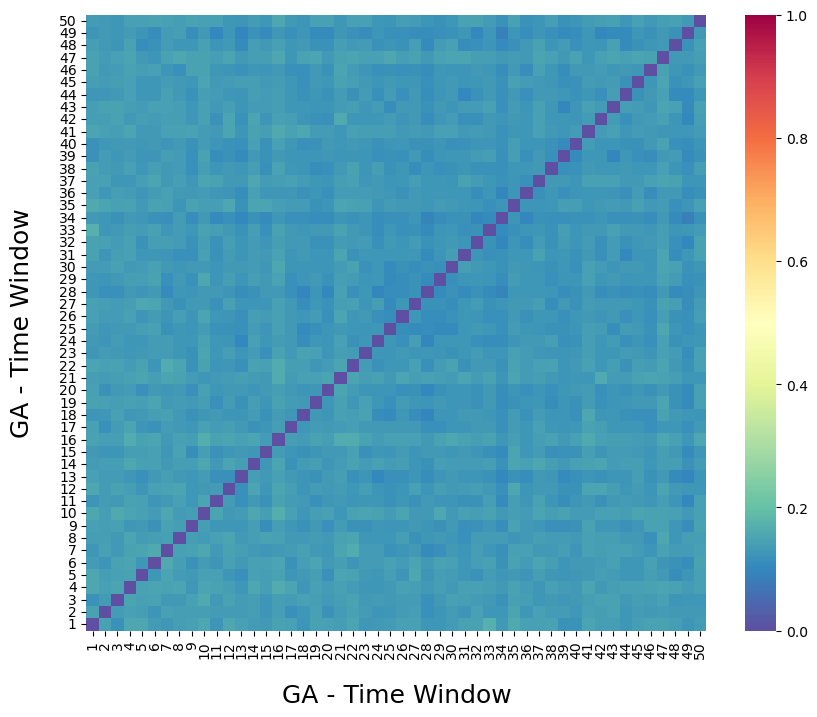

CSO CSO


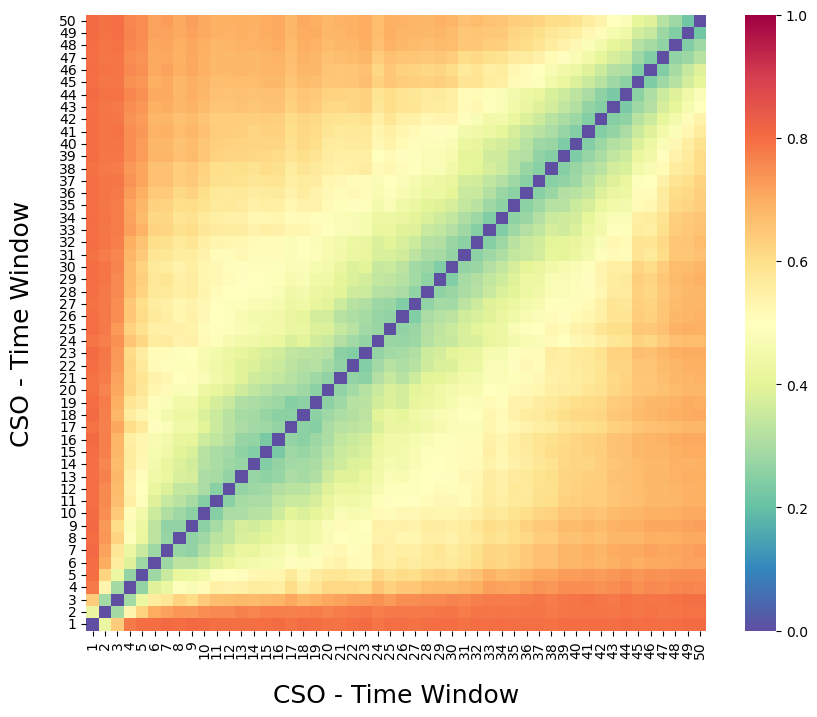

In [7]:
for alg_name1, data1 in tqdm(networks_per_tw_dict.items(), leave=False):
    plot_matrix_tw((alg_name1, data1), (alg_name1, data1), tw_size, processed_results_dir)

<div class="alert alert-block alert-success" style="font-size: 16px"> Visualisation of optimisation metrics </div>

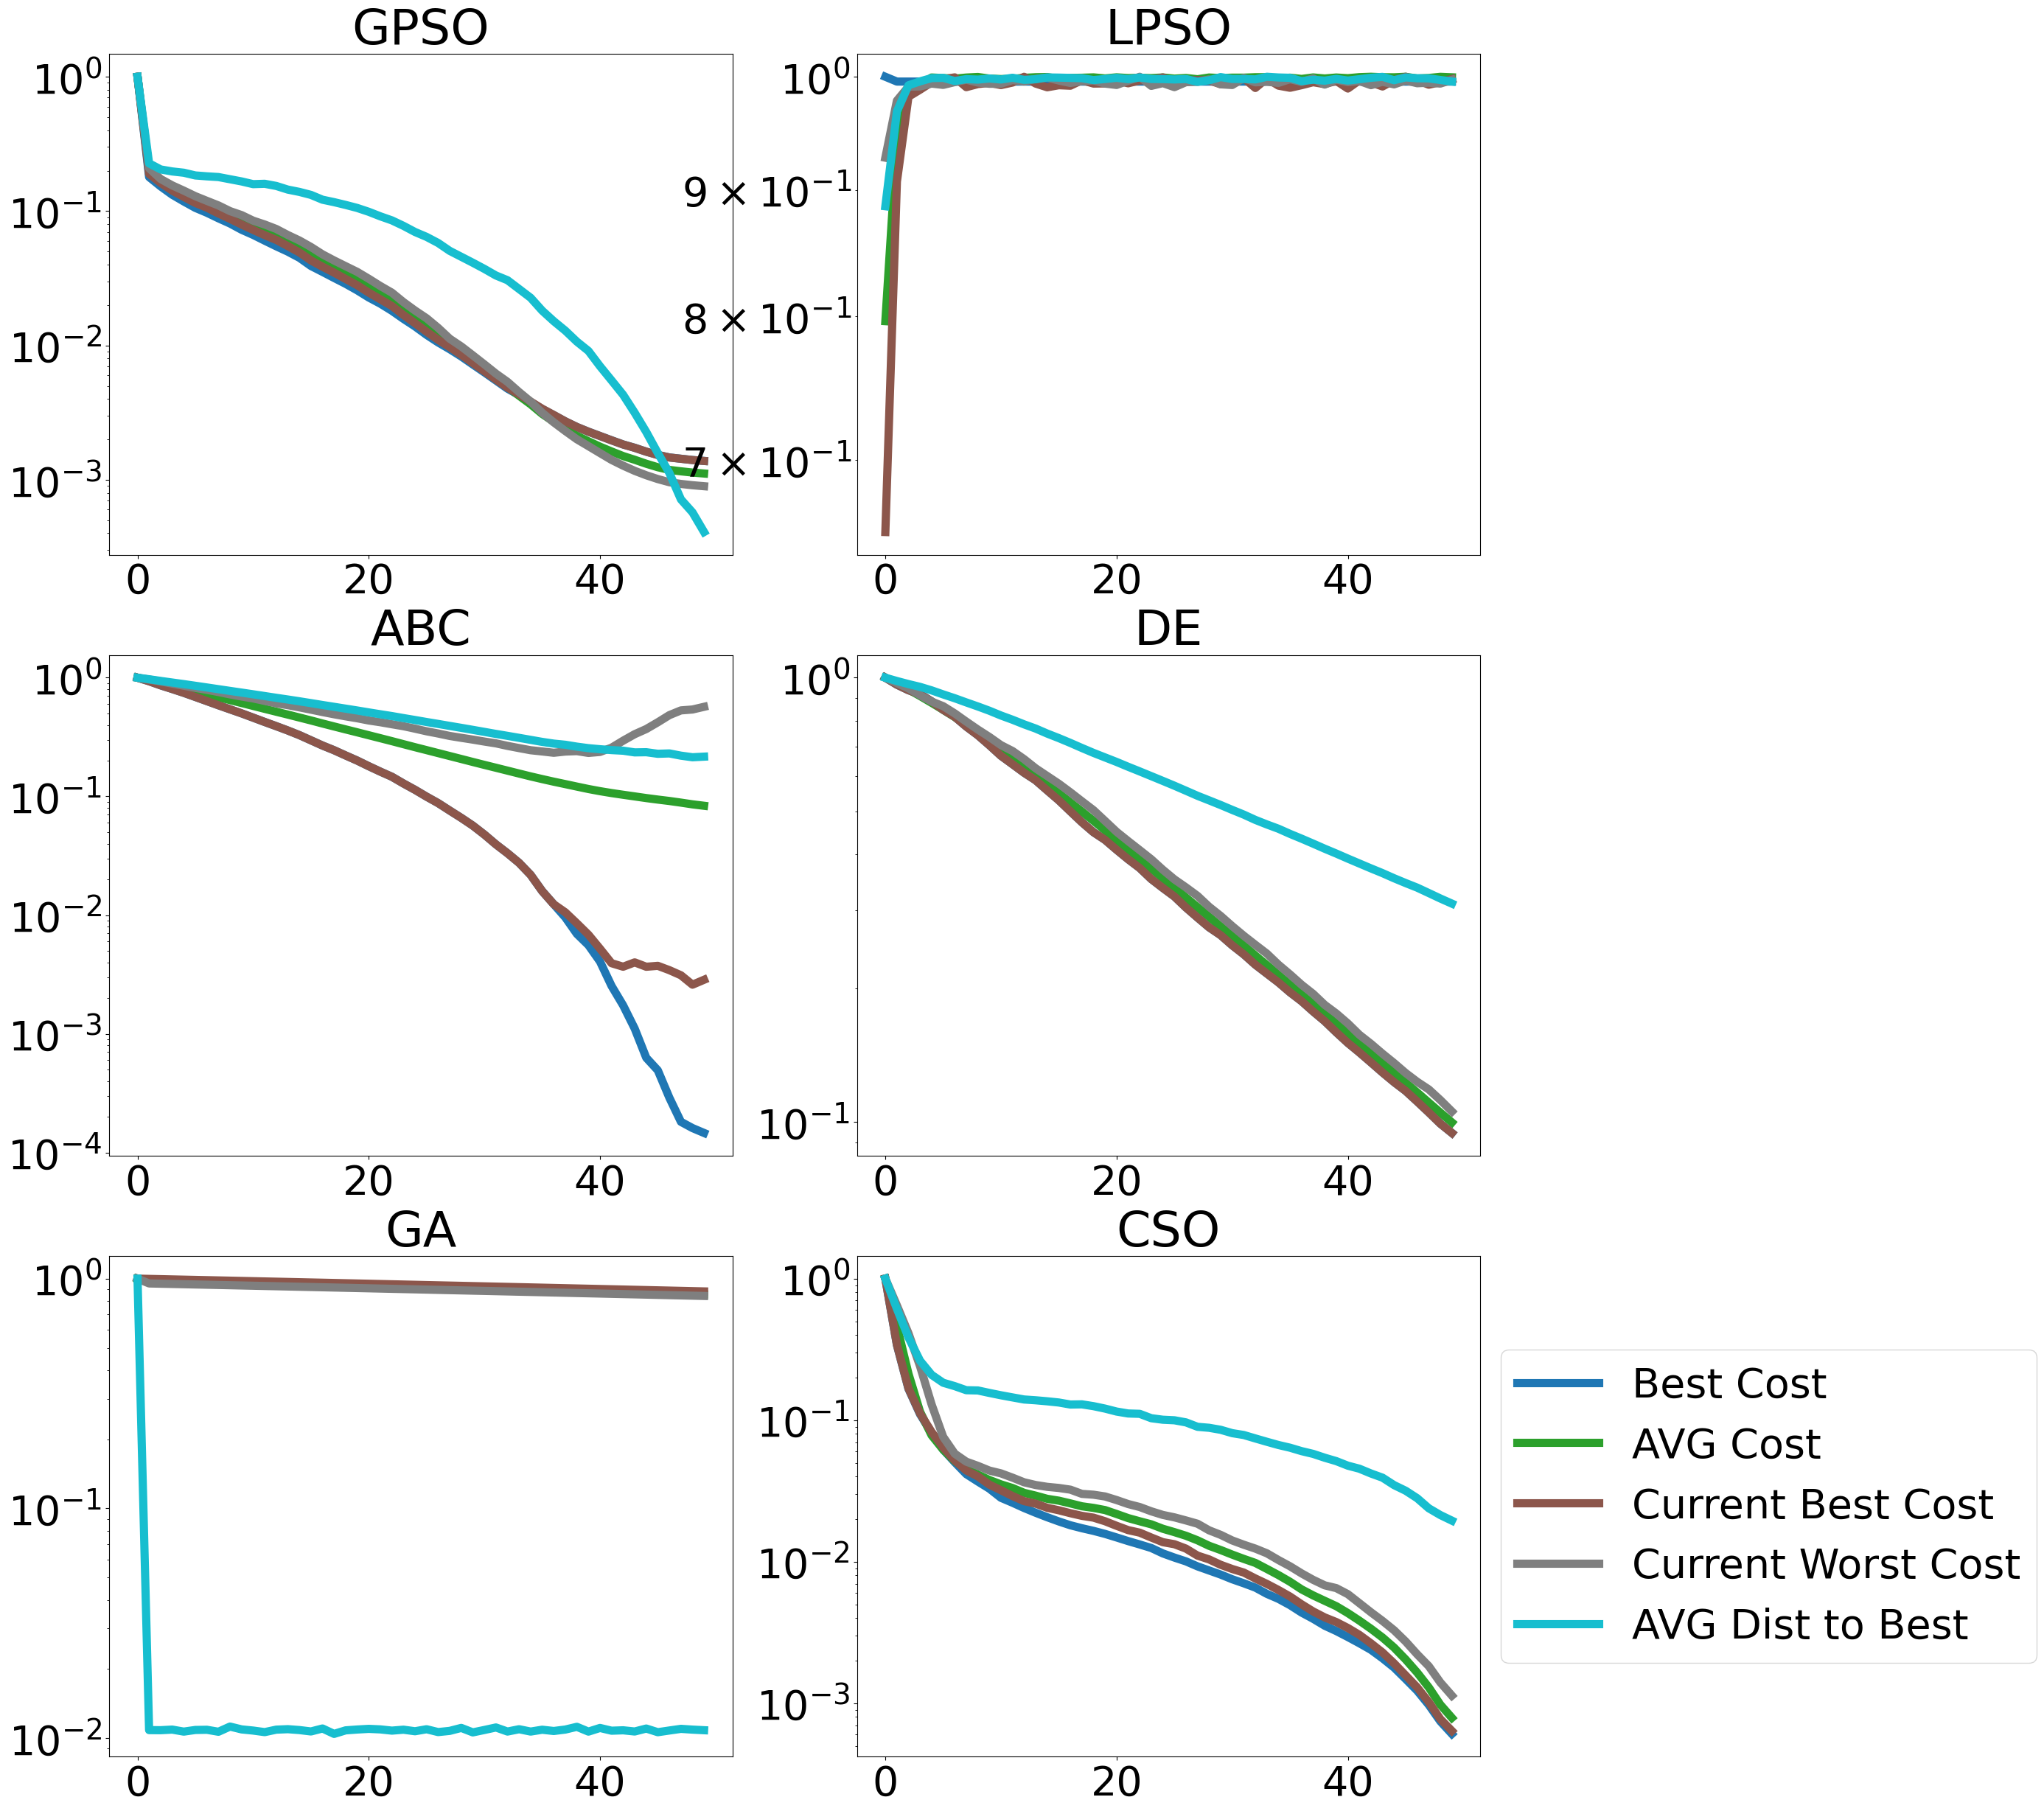

In [8]:
swarm_data = {}
for alg, data in networks_per_tw_dict.items():  
    temp_ = load_data_per_tw(alg, num_execs=num_executions, num_iter=num_iter, tw=tw_size, dim=problem_dim, 
                             func=problem, output_dir=output_dir)
    swarm_data[alg] = temp_
plot_swarm_curves(swarm_data, show_std=False,log=True)

<div class="alert alert-block alert-success" style="font-size: 16px"> Visualisation of network metrics </div>

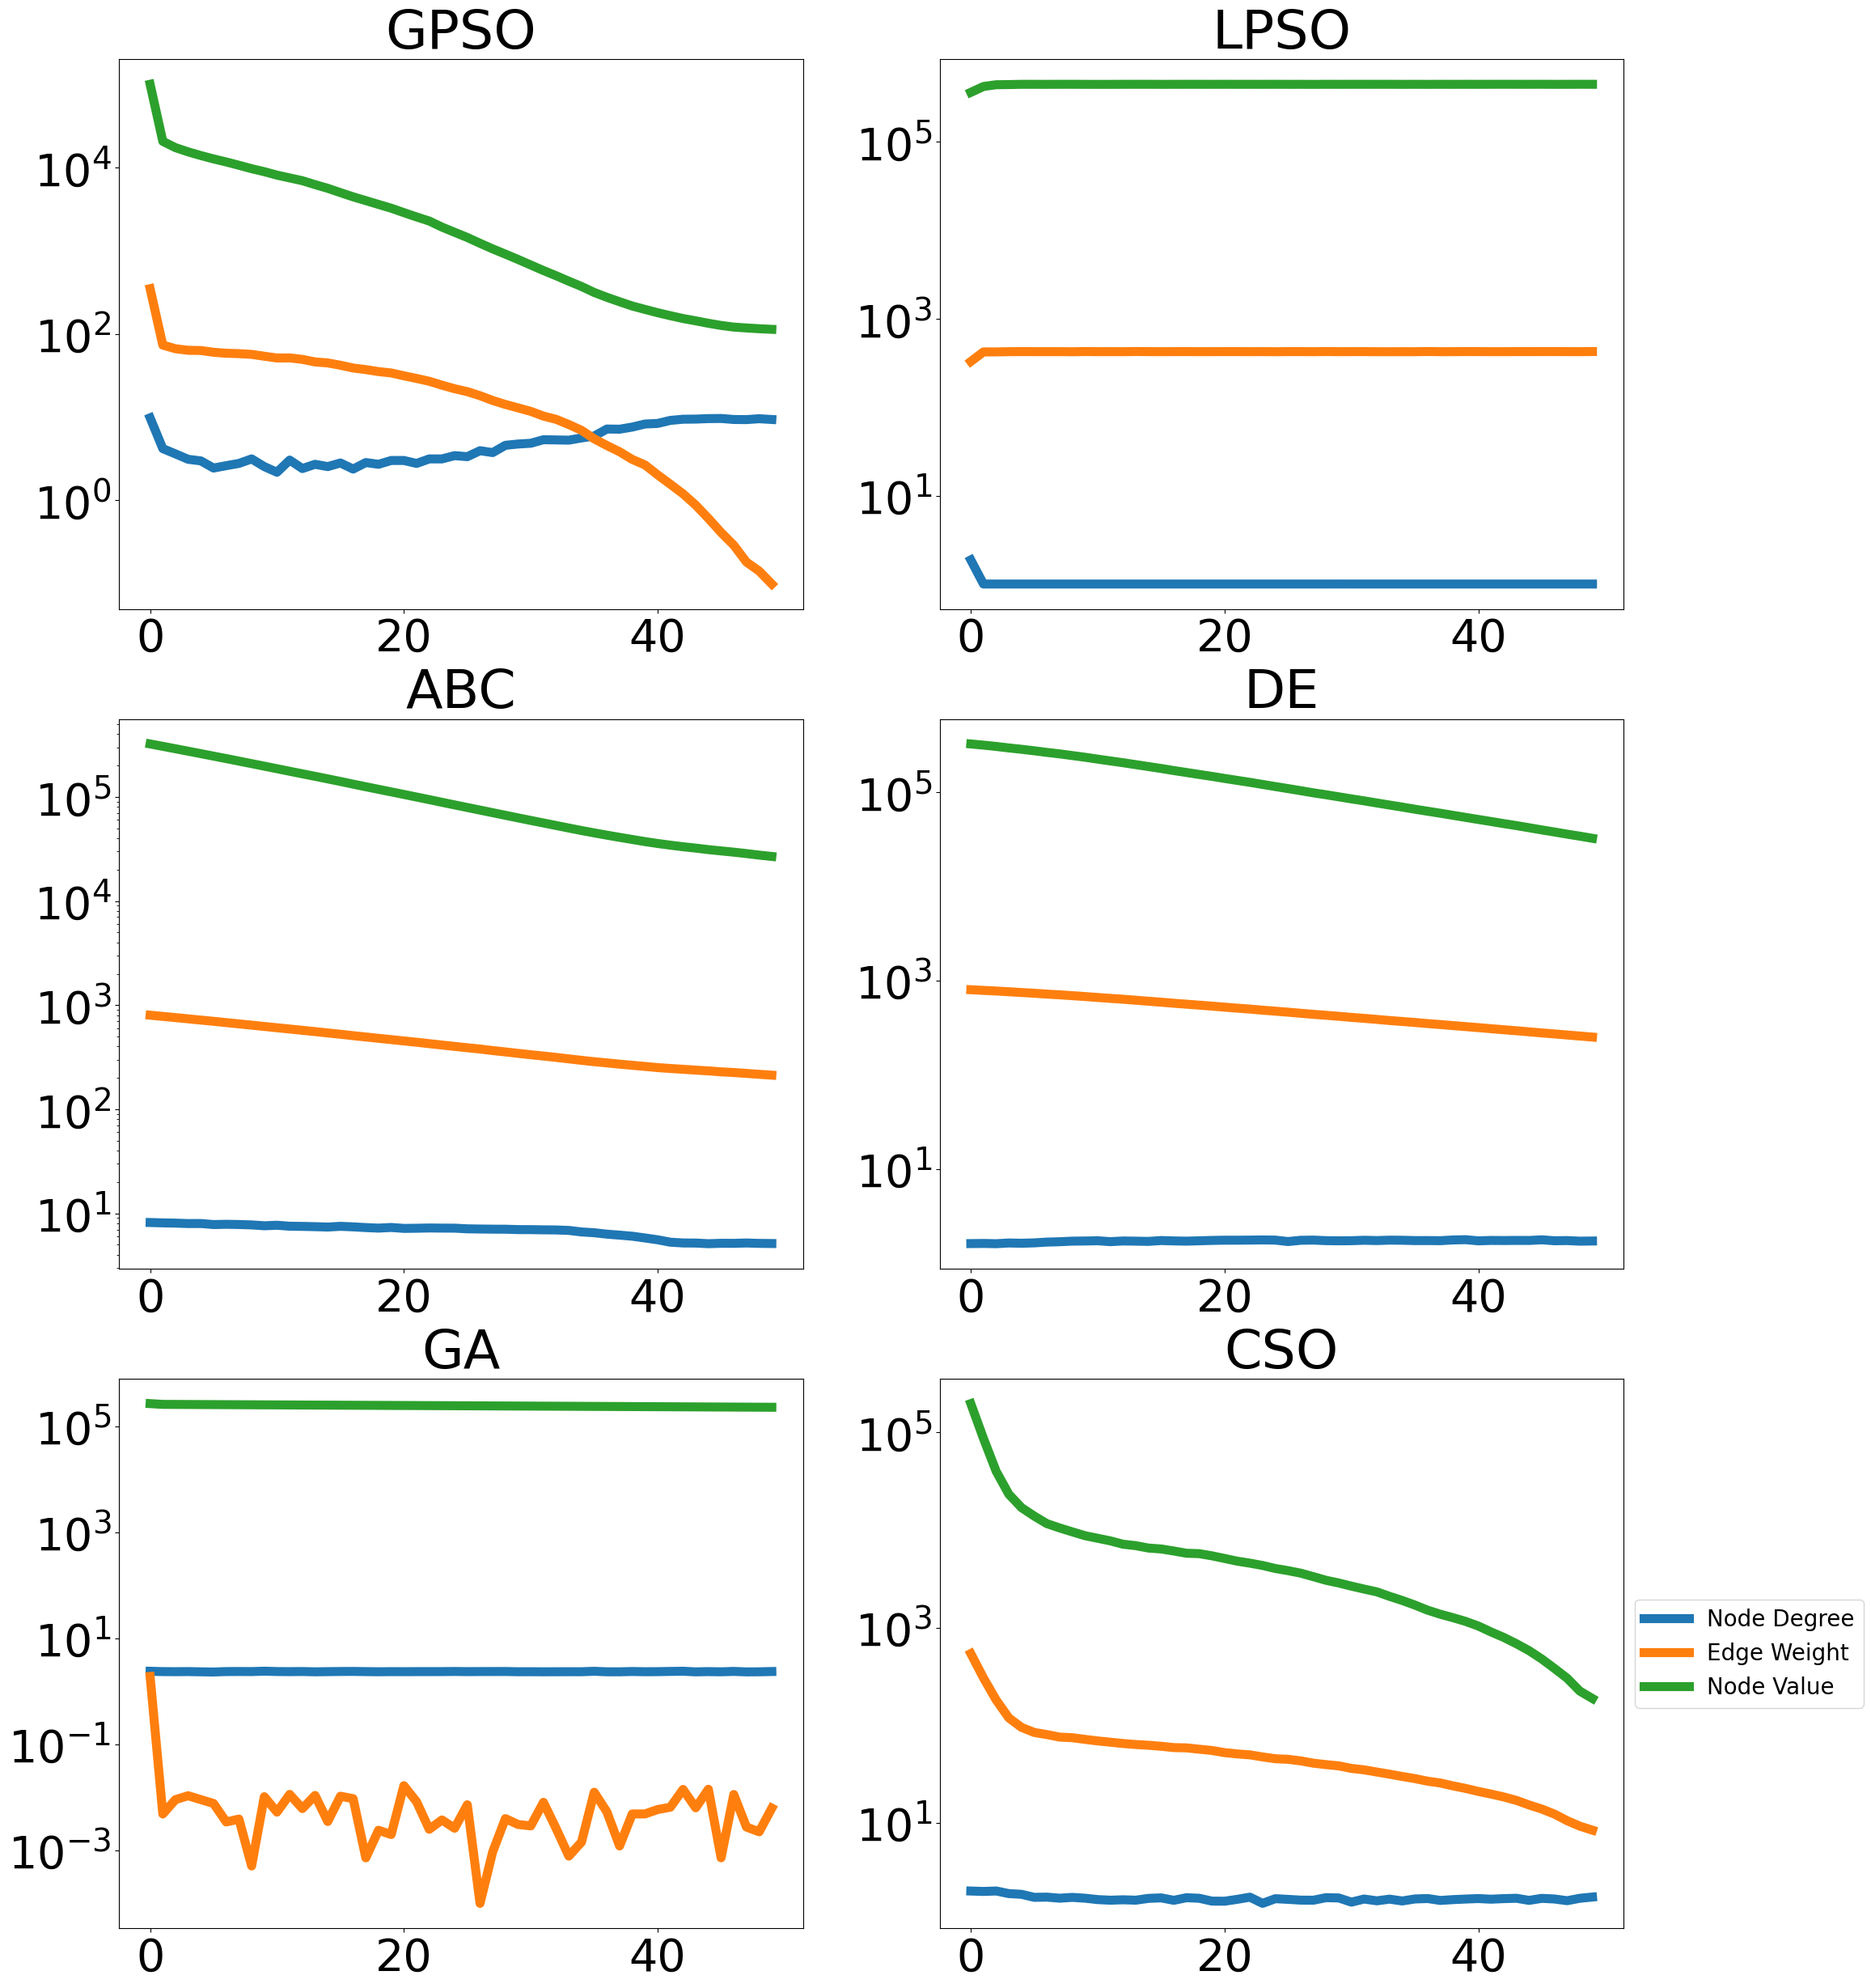

In [9]:
network_data = get_network_data(networks_per_tw_dict)
plot_network_curves(network_data, show_std=False, log=True)

<div class="alert alert-block alert-success" style="font-size: 16px"> Interaction diversity curves</div>

  0%|          | 0/6 [00:00<?, ?it/s]

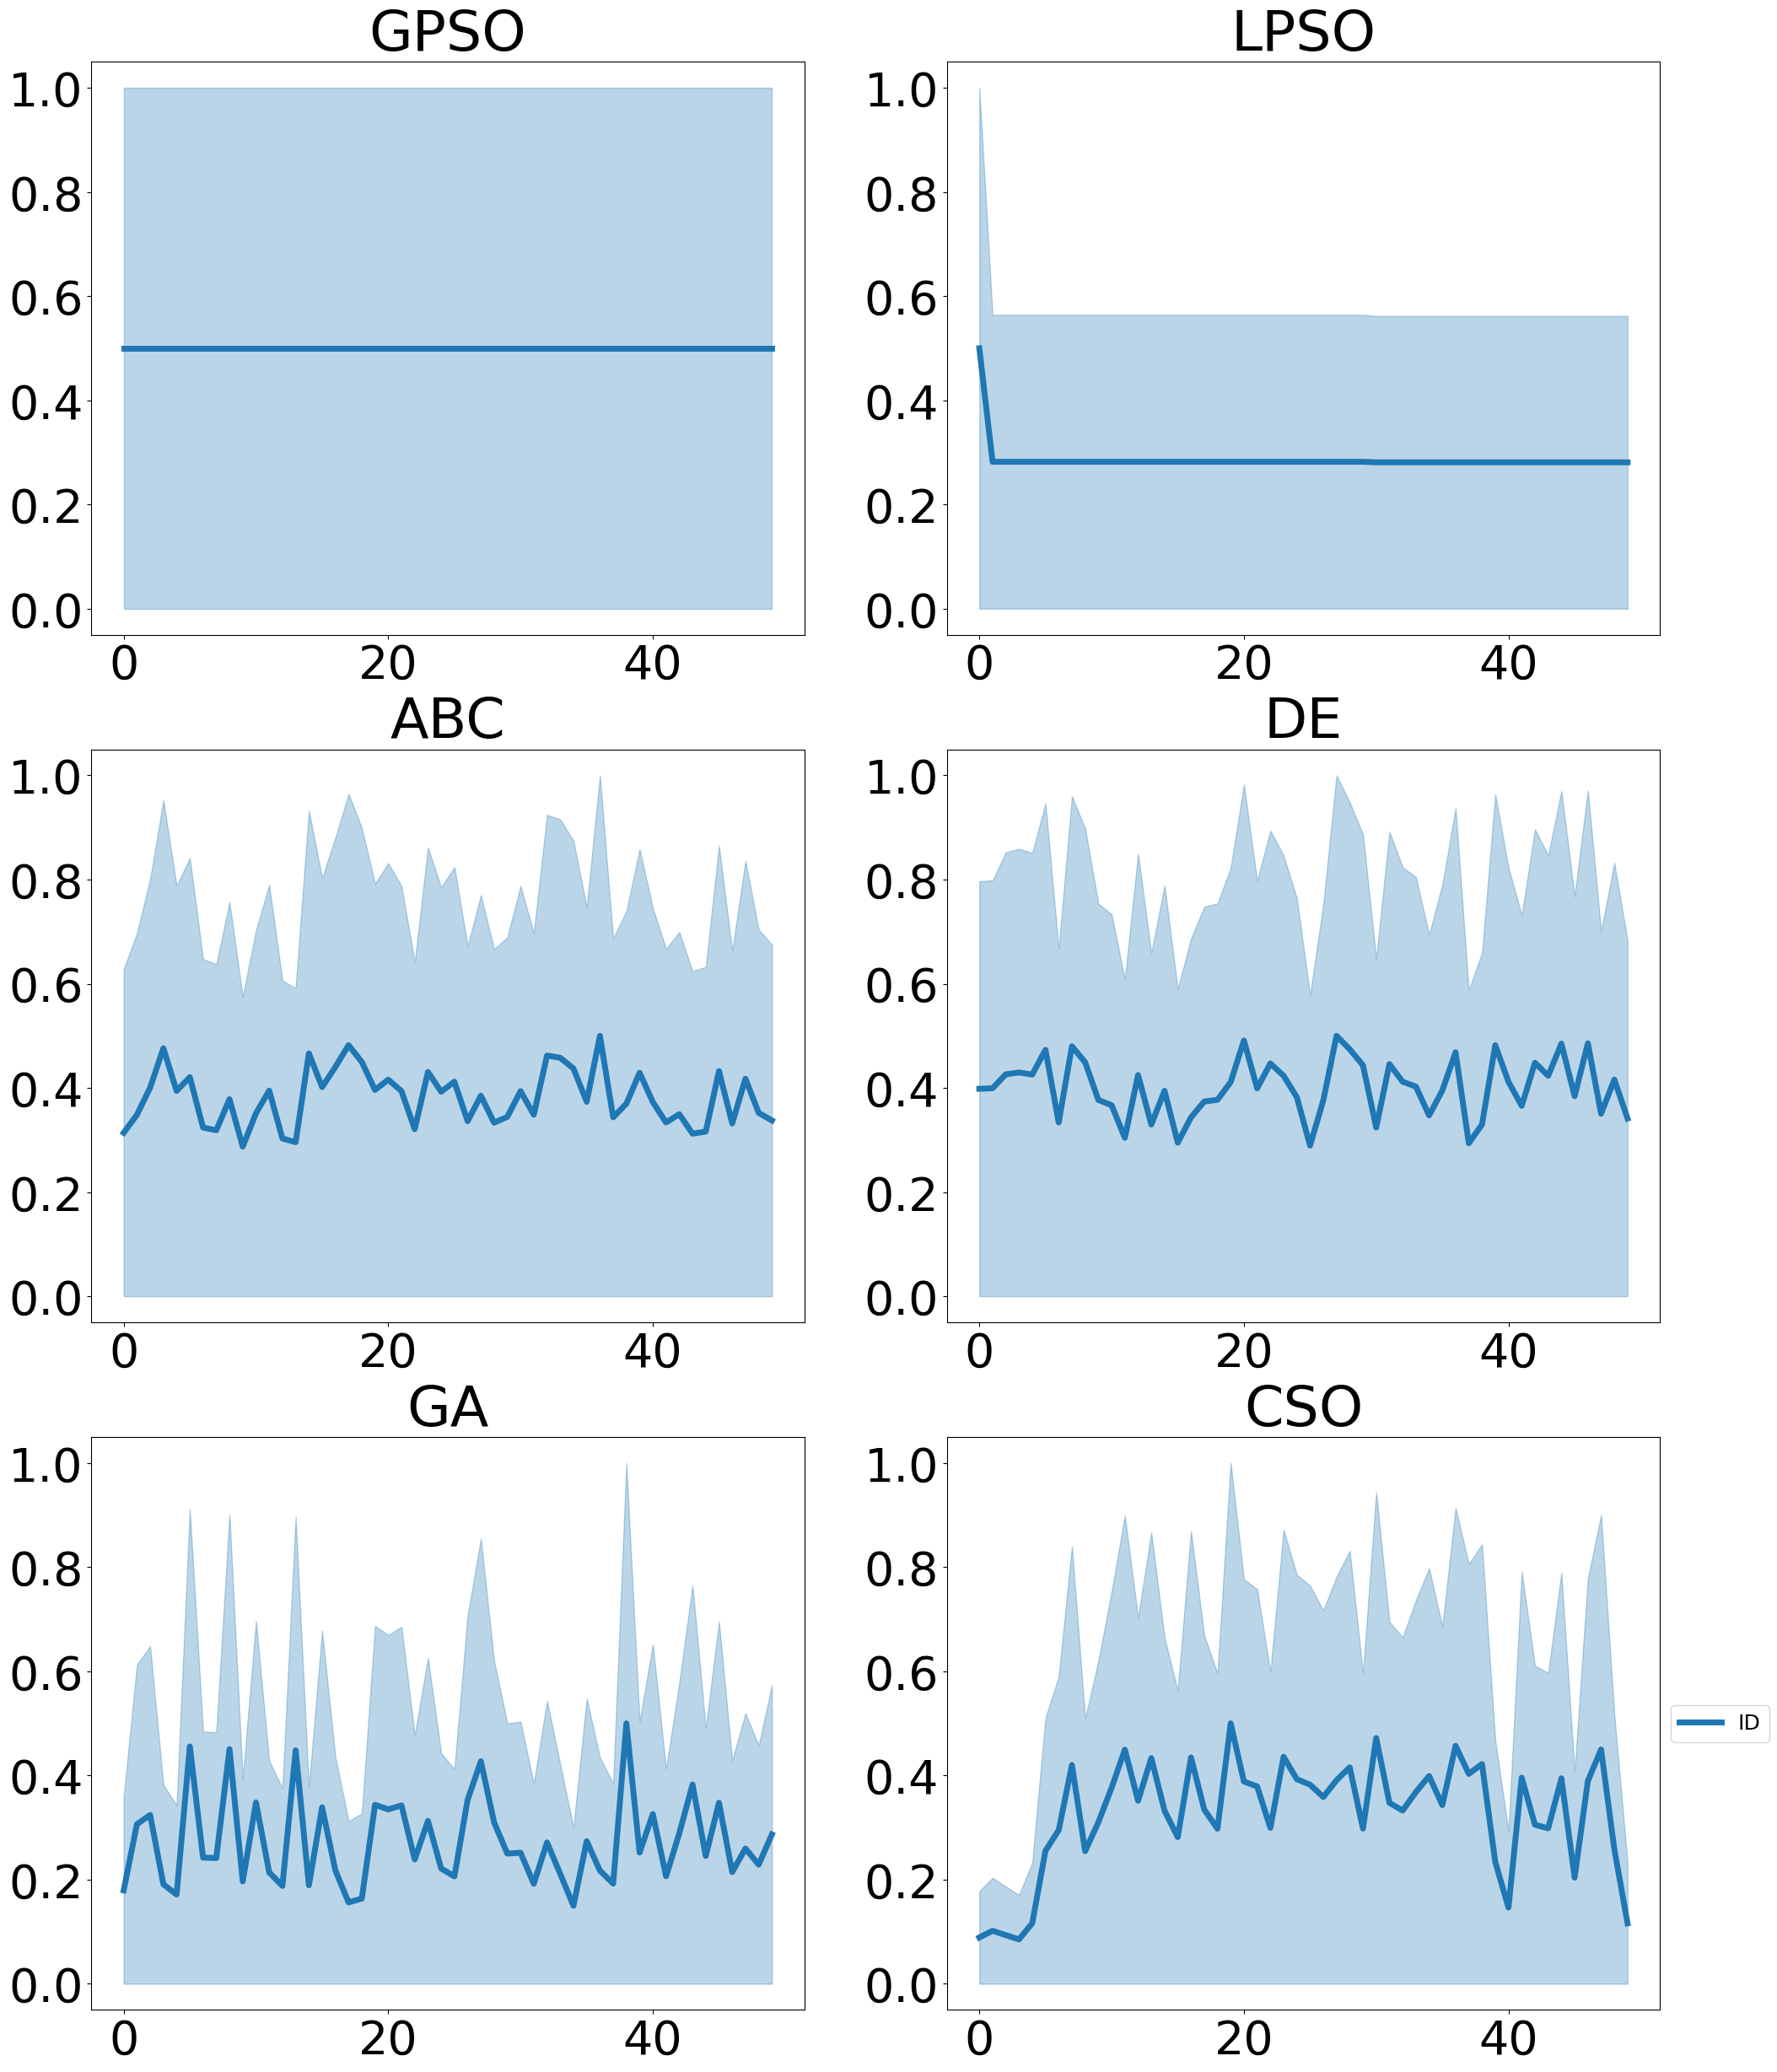

In [10]:
id_data = get_id_data(networks_per_tw_dict)
plot_id_curves(id_data, True) 

<div class="alert alert-block alert-success" style="font-size: 16px">Preparing a dataframe based on the TWs' PD heatmap</div>

In [11]:
alg_dataframe_pd = pd.DataFrame(columns=['Algorithm1', 'Algorithm2', 'PD'])
for a1 in tqdm(algorithms, leave=False):
    for a2 in tqdm(algorithms, leave=False):
        try:
            data_alg = pd.read_csv(processed_results_dir+f'/{a1}_{a2}_pd_difference_results_tw.txt', header=None)
            data_ = [[a1, a2, pd_val] for pd_val in data_alg[0].values]
            temp_df = pd.DataFrame(data_, columns=['Algorithm1', 'Algorithm2', 'PD'])
            alg_dataframe_pd = pd.concat([alg_dataframe_pd, temp_df])
        except:
            pass
alg_dataframe_pd.head()

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Algorithm1 Algorithm2        PD
0       GPSO       GPSO  0.903728
1       GPSO       GPSO  0.833239
2       GPSO       GPSO  0.833239
3       GPSO       GPSO  0.873288
4       GPSO       GPSO  0.852941

In [12]:
test_algo_df = pd.DataFrame()
num_tws = num_iter//tw_size
for a in alg_dataframe_pd.Algorithm1.unique():
    line = []
    for e in range(0, num_tws*num_tws*num_executions, num_tws*num_tws):
        mat = np.reshape(alg_dataframe_pd[(alg_dataframe_pd.Algorithm1==a) & (alg_dataframe_pd.Algorithm2==a)]['PD'].values[e:e+(num_tws*num_tws)], (num_tws, num_tws))
        ct = num_tws
        for r in range(num_tws):
            for c in range(ct):
                line.append(mat[r][c])
            ct -= 1
    test_algo_df[a] =  line
test_algo_df.head()

GPSO      LPSO       ABC        DE        GA       CSO
0  0.903728  0.245275  0.859963  0.626515  0.196237  0.816093
1  0.833239  0.145736  0.859733  0.611699  0.116488  0.800694
2  0.833239  0.152830  0.846640  0.626840  0.116618  0.806736
3  0.873288  0.136968  0.837396  0.632838  0.243996  0.723831
4  0.852941  0.099495  0.833447  0.634419  0.099925  0.747616

<div class="alert alert-block alert-success" style="font-size: 16px"> Using different statistical test to compare the distributions of the algorithms</div>

In [13]:
for a1 in test_algo_df.columns:
    for a2 in test_algo_df.columns:
        ks = kendalltau(test_algo_df[a1].values, test_algo_df[a2].values)
        print('{} vs {}: '.format(a1, a2), ks)
    print()

GPSO vs GPSO:  SignificanceResult(statistic=1.0, pvalue=0.0)
GPSO vs LPSO:  SignificanceResult(statistic=0.11615234131531813, pvalue=1.4565377109343283e-253)
GPSO vs ABC:  SignificanceResult(statistic=0.21605661584094035, pvalue=0.0)
GPSO vs DE:  SignificanceResult(statistic=0.427133931975463, pvalue=0.0)
GPSO vs GA:  SignificanceResult(statistic=0.07198524447262793, pvalue=1.2225195348948517e-98)
GPSO vs CSO:  SignificanceResult(statistic=0.4173725421844131, pvalue=0.0)

LPSO vs GPSO:  SignificanceResult(statistic=0.11615234131531814, pvalue=1.4565377109343283e-253)
LPSO vs LPSO:  SignificanceResult(statistic=1.0, pvalue=0.0)
LPSO vs ABC:  SignificanceResult(statistic=0.12365549356531128, pvalue=2.944349248360342e-287)
LPSO vs DE:  SignificanceResult(statistic=0.08043967390448925, pvalue=9.534003330961129e-123)
LPSO vs GA:  SignificanceResult(statistic=0.07650886641684242, pvalue=3.124422384444533e-111)
LPSO vs CSO:  SignificanceResult(statistic=0.14173477136179752, pvalue=0.0)

ABC v

<div class="alert alert-block alert-success" style="font-size: 16px"> Creating the adjacency matrix based on the PD heatmaps per TWs</div>

13.388310724514564


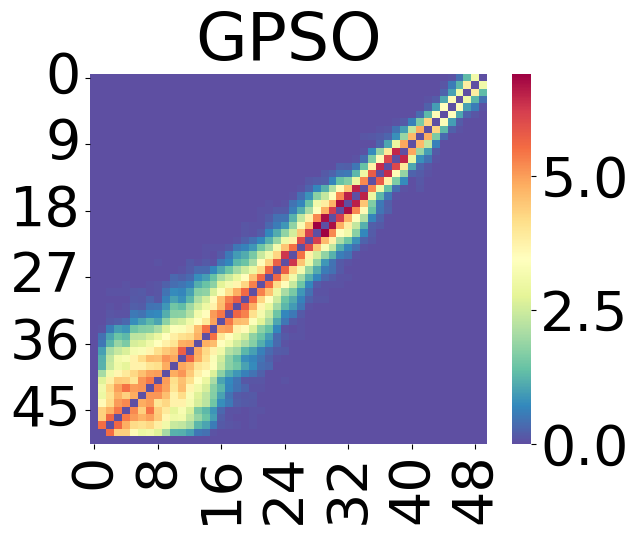

13.479041235154543


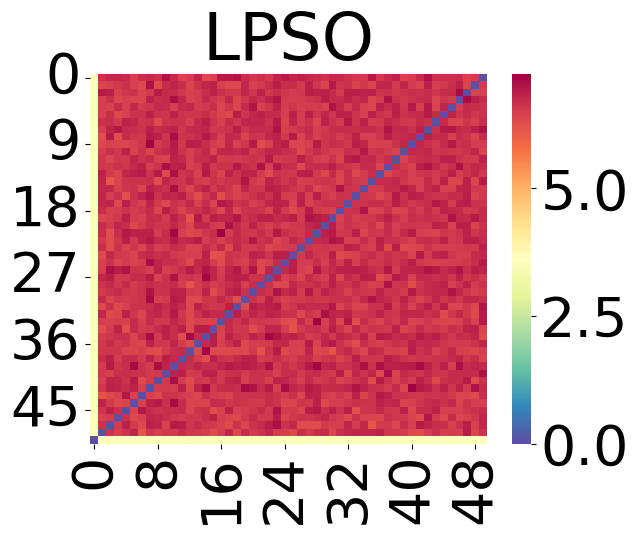

14.416361543662454


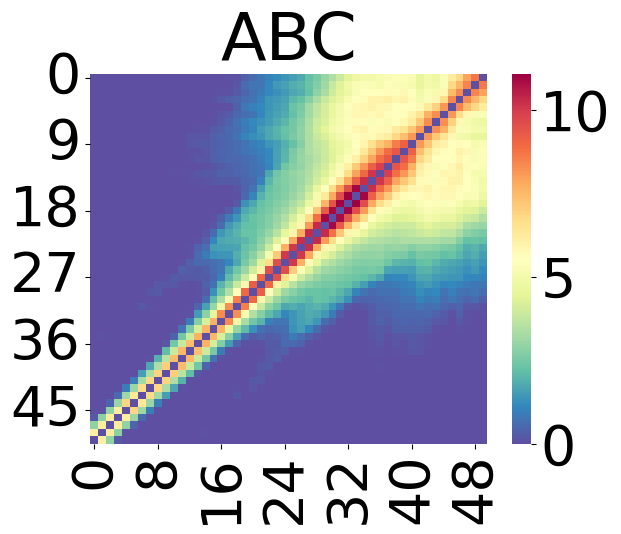

16.33331329439534


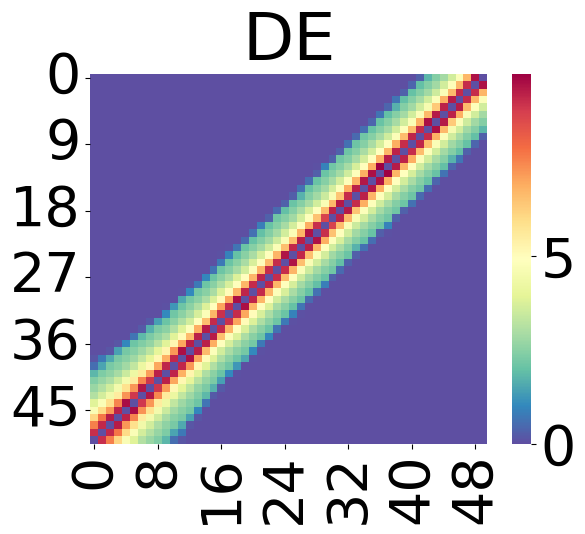

19.99961555184172


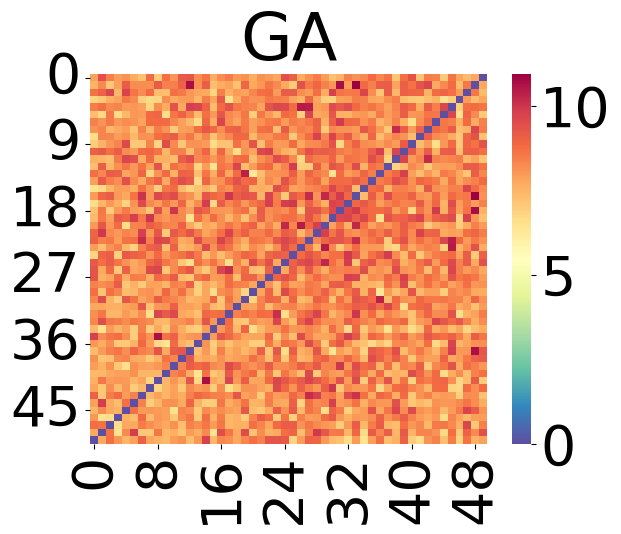

10.179061398457607


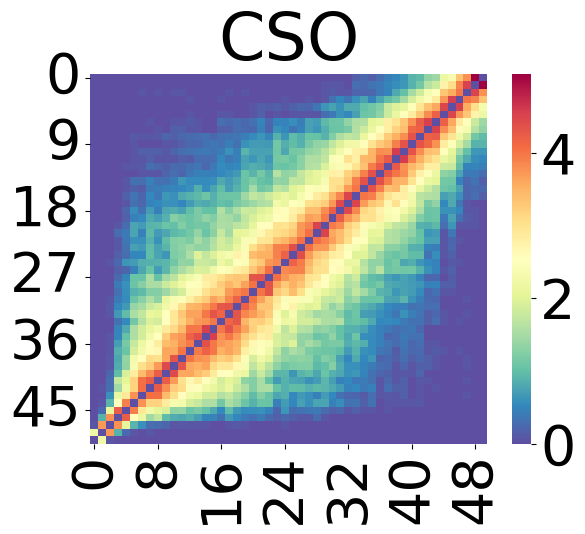

In [14]:
graphs_alg = {}
num_tws = num_iter//tw_size
for a in algorithms:
    exs_g = []
    mat_pds = alg_dataframe_pd[(alg_dataframe_pd.Algorithm1 ==a) & (alg_dataframe_pd.Algorithm2 ==a)]['PD'].values
    mat_pds = np.array([1/x if 0.05 < x <= .5 else 0 for x in mat_pds] )
    print(max(mat_pds))
    for ex in range(num_executions):
        exs_g.append(nx.from_numpy_array(np.reshape(mat_pds.reshape(num_executions, num_tws*num_tws)[ex], (num_tws, num_tws))))
        
    sns.heatmap(np.reshape(mat_pds.reshape(num_executions, 2500).mean(axis=0), (50, 50)), cmap=plt.cm.Spectral_r)
    plt.title(a)
    plt.show()
    graphs_alg[a] = exs_g

<div class="alert alert-block alert-success" style="font-size: 16px"> Creating PD comparison dataframe</div>

In [15]:
res_df = []
for a1, net1 in tqdm(graphs_alg.items(), leave=False):
    for a2, net2 in graphs_alg.items():
        for ex in range(num_executions):
            if a1 != a2:
                w_djs, w_bg, w_bh = portrait_divergence_weighted(net1[ex], net2[ex])              
                res_df.append([a1, a2, w_djs])
res_df = pd.DataFrame(res_df, columns=['Algorithm1', 'Algorithm2', 'PD'])    
res_df.head()

  0%|          | 0/6 [00:00<?, ?it/s]

Algorithm1 Algorithm2        PD
0       GPSO       LPSO  0.472800
1       GPSO       LPSO  0.472935
2       GPSO       LPSO  0.561434
3       GPSO       LPSO  0.556224
4       GPSO       LPSO  0.568658

<div class="alert alert-block alert-success" style="font-size: 16px"> Similarity comparison using boxplots</div>

  0%|          | 0/6 [00:00<?, ?it/s]

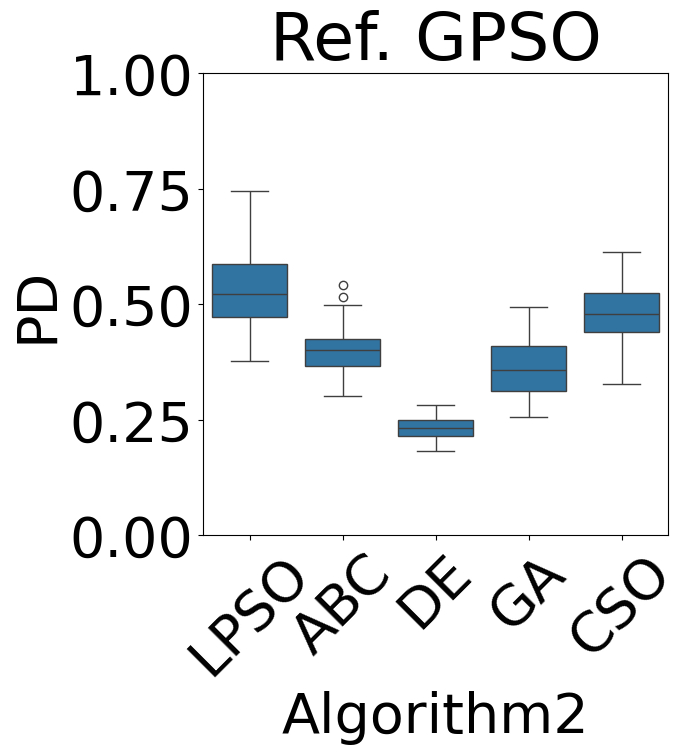

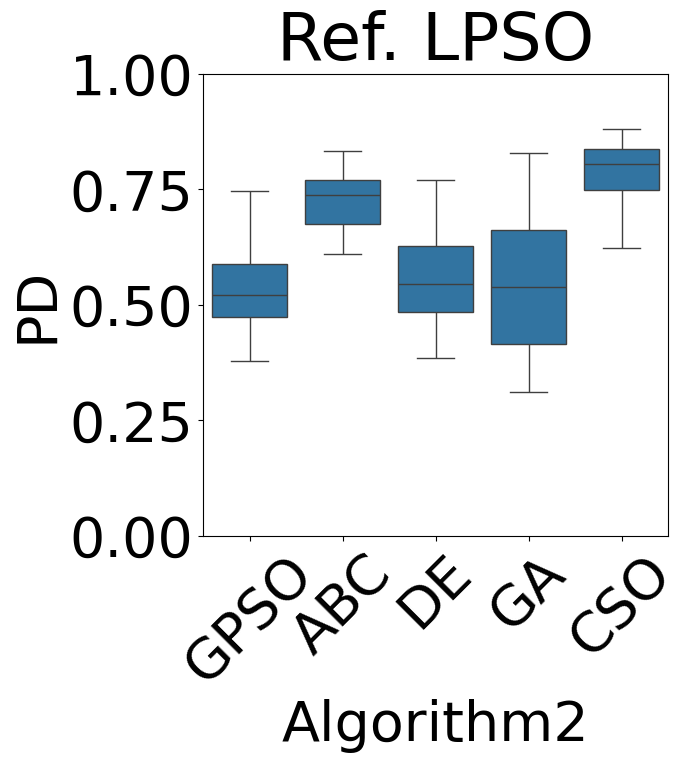

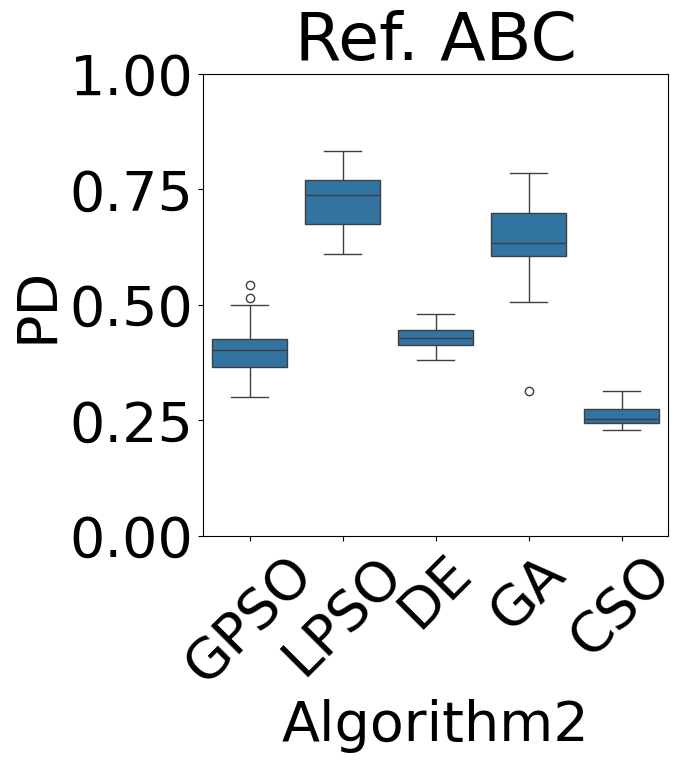

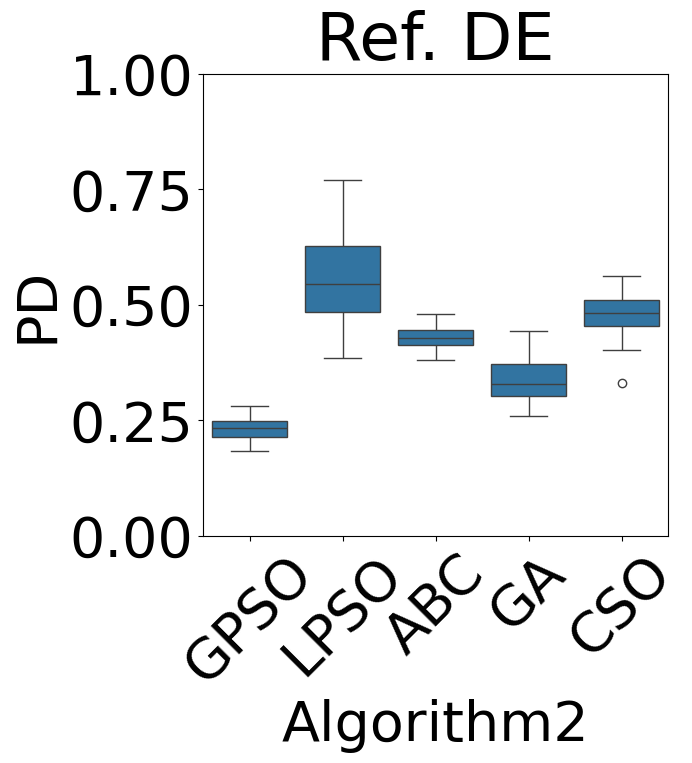

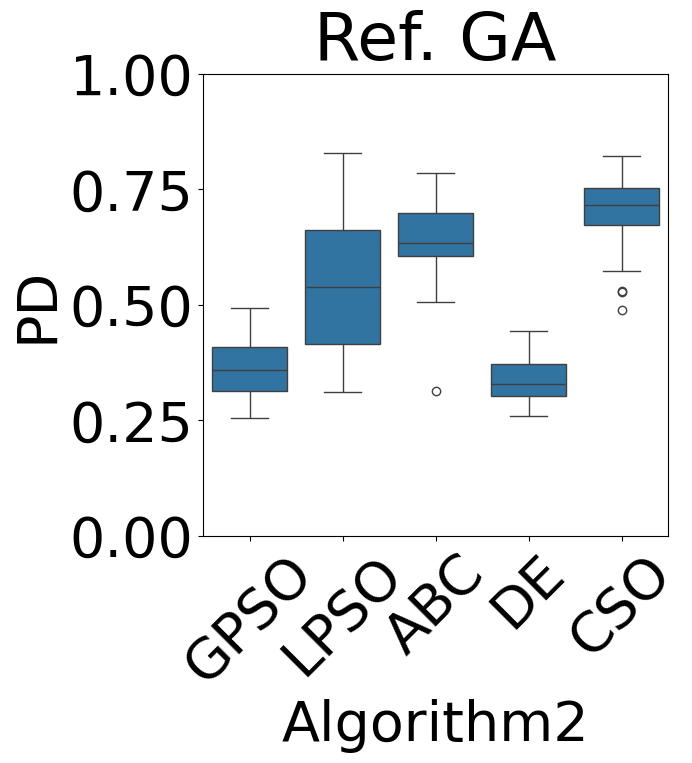

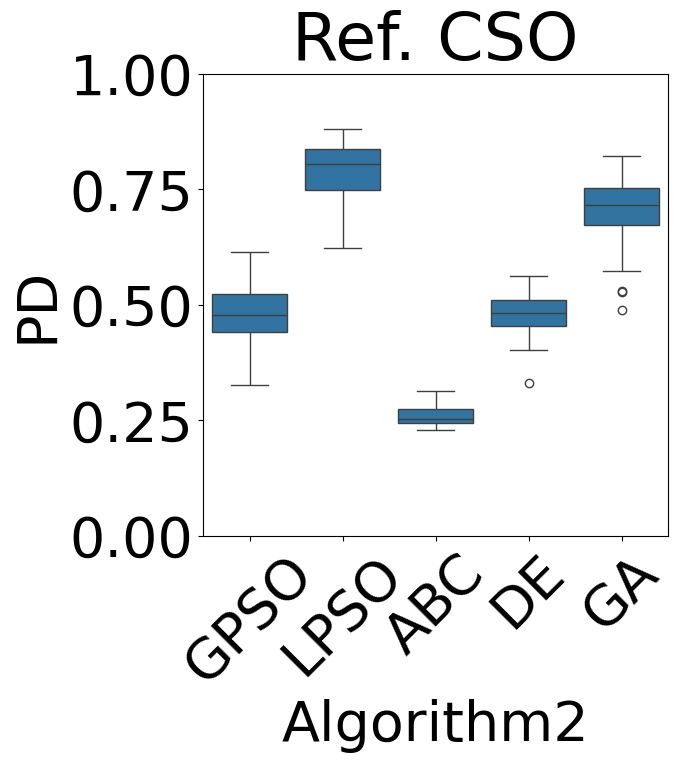

In [16]:
for a in tqdm(algorithms, leave=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(x="Algorithm2", y="PD", data=res_df[res_df.Algorithm1 == a])
    plt.xticks(rotation=45)
    plt.ylim([0, 1])
    plt.title(f"Ref. {a}")
    plt.show()

<div class="alert alert-block alert-success" style="font-size: 16px"> Preparing the data to analise the distributions </div>

In [17]:
alg_dataframe_pd = pd.DataFrame(columns=['Algorithm', 'PD'])
for a in tqdm(algorithms, leave=False):
    data_alg = pd.read_csv(processed_results_dir+'/{}_{}_pd_difference_results_tw.txt'.format(a, a), header=None)
    data_ = [[a, pd_val] for pd_val in data_alg[0].values]
    temp_df = pd.DataFrame(data_, columns=['Algorithm', 'PD'])
    alg_dataframe_pd = pd.concat([alg_dataframe_pd, temp_df])
alg_dataframe_pd.head()

  0%|          | 0/6 [00:00<?, ?it/s]

Algorithm        PD
0      GPSO  0.903728
1      GPSO  0.833239
2      GPSO  0.833239
3      GPSO  0.873288
4      GPSO  0.852941

<div class="alert alert-block alert-success" style="font-size: 16px"> Visualising the OCDF distributions</div>

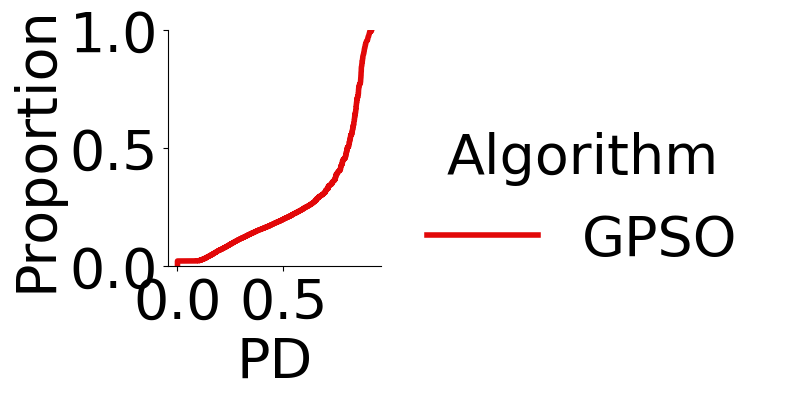

In [18]:
colors = ['#E20809', '#2E79B5']
sns.displot(alg_dataframe_pd[alg_dataframe_pd.Algorithm.isin(['GPSO', 'PSOPS'])], x='PD', 
            kind='ecdf', hue='Algorithm', aspect=1., linewidth=4, palette=colors)
plt.show()

<div class="alert alert-block alert-success" style="font-size: 16px">Comparing the generated networks using the PD metric</div>

In [19]:
res_df = pd.DataFrame()
for a1, net1 in graphs_alg.items():
    for a2, net2 in graphs_alg.items():
        res_g = []
        for ex in range(num_executions):
            w_djs, w_bg, w_bh = portrait_divergence_weighted(net1[ex], net2[ex])  
            res_g.append(w_djs)
        if a1 != a2:
            res_df["{} vs {}: ".format(a1, a2)] = res_g
        print("{} vs {}: ".format(a1, a2), np.mean(w_djs))
    print()
res_df.head()

GPSO vs GPSO:  0.0
GPSO vs LPSO:  0.451856183970195
GPSO vs ABC:  0.3978250955372715
GPSO vs DE:  0.18239159864722093
GPSO vs GA:  0.29694813289636046
GPSO vs CSO:  0.49215303355712814

LPSO vs GPSO:  0.451856183970195
LPSO vs LPSO:  0.0
LPSO vs ABC:  0.6987561690585113
LPSO vs DE:  0.5046594262157376
LPSO vs GA:  0.40993509554074165
LPSO vs CSO:  0.8124177880475595

ABC vs GPSO:  0.3978250955372715
ABC vs LPSO:  0.6987561690585113
ABC vs ABC:  0.0
ABC vs DE:  0.4117134500137379
ABC vs GA:  0.6043100304371664
ABC vs CSO:  0.22854127885282918

DE vs GPSO:  0.18239159864722093
DE vs LPSO:  0.5046594262157376
DE vs ABC:  0.4117134500137379
DE vs DE:  0.0
DE vs GA:  0.2939749932512985
DE vs CSO:  0.5110037321003732

GA vs GPSO:  0.29694813289636046
GA vs LPSO:  0.40993509554074165
GA vs ABC:  0.6043100304371664
GA vs DE:  0.2939749932512985
GA vs GA:  0.0
GA vs CSO:  0.6958940352724998

CSO vs GPSO:  0.49215303355712814
CSO vs LPSO:  0.8124177880475595
CSO vs ABC:  0.22854127885282918
CSO 

GPSO vs LPSO:   GPSO vs ABC:   GPSO vs DE:   GPSO vs GA:   GPSO vs CSO:   \
0        0.472800       0.541510      0.251252      0.255187       0.602638   
1        0.472935       0.412029      0.227859      0.337074       0.517983   
2        0.561434       0.357375      0.277960      0.492616       0.481592   
3        0.556224       0.474018      0.241756      0.293242       0.524748   
4        0.568658       0.321833      0.200270      0.400957       0.366419   

   LPSO vs GPSO:   LPSO vs ABC:   LPSO vs DE:   LPSO vs GA:   LPSO vs CSO:   \
0        0.472800       0.751364      0.483911      0.352385       0.793863   
1        0.472935       0.774067      0.394434      0.321071       0.847997   
2        0.561434       0.775654      0.599038      0.683580       0.864778   
3        0.556224       0.725209      0.599080      0.664222       0.811227   
4        0.568658       0.808445      0.617849      0.617371       0.786796   

   ...  GA vs GPSO:   GA vs LPSO:   GA vs ABC:   GA vs DE:   GA vs CSO:   \
0  ...      0.255187      0.352385     0.621423    0.266784     0.668042   
1  ...      0.337074      0.321071     0.637092    0.292639     0.748818   
2  ...      0.492616      0.683580     0.700180    0.377505     0.815326   
3  ...      0.293242      0.664222     0.671355    0.316531     0.710360   
4  ...      0.400957      0.617371     0.684476    0.309680     0.721556   

   CSO vs GPSO:   CSO vs LPSO:   CSO vs ABC:   CSO vs DE:   CSO vs GA:   
0       0.602638       0.793863      0.240970     0.453855     0.668042  
1       0.517983       0.847997      0.253443     0.547775     0.748818  
2       0.481592       0.864778      0.286605     0.531275     0.815326  
3       0.524748       0.811227      0.252679     0.459928     0.710360  
4       0.366419       0.786796      0.251776     0.450590     0.721556  

[5 rows x 30 columns]

<div class="alert alert-block alert-success" style="font-size: 16px"> PD heatmaps: Mean and STD values</div>

Max STD  0.2241494172729418


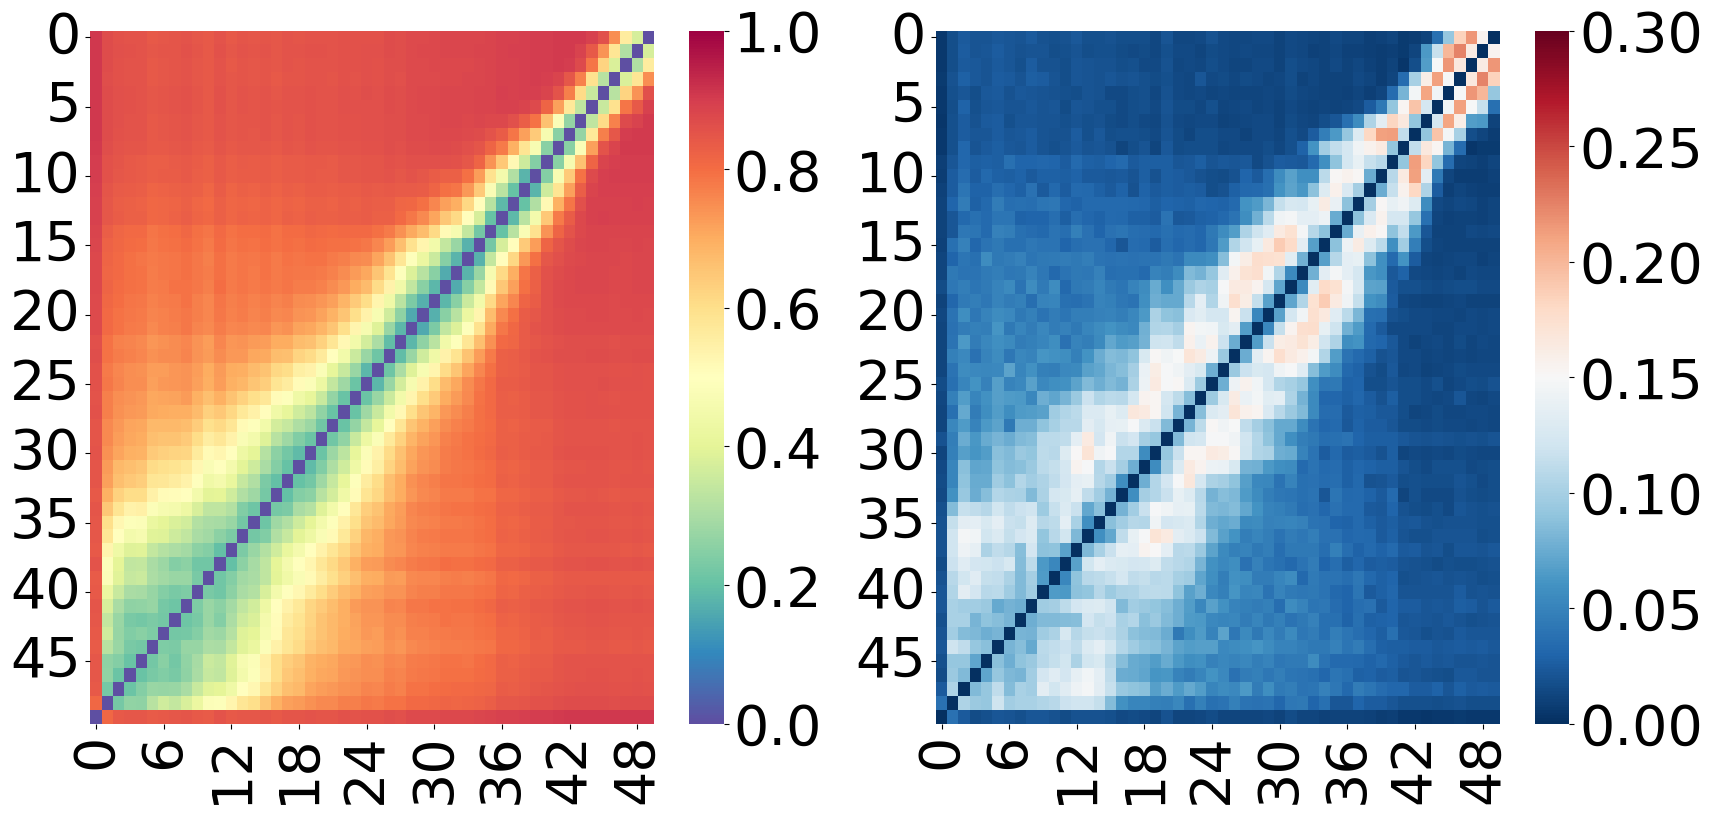

Max STD  0.04486570547006715


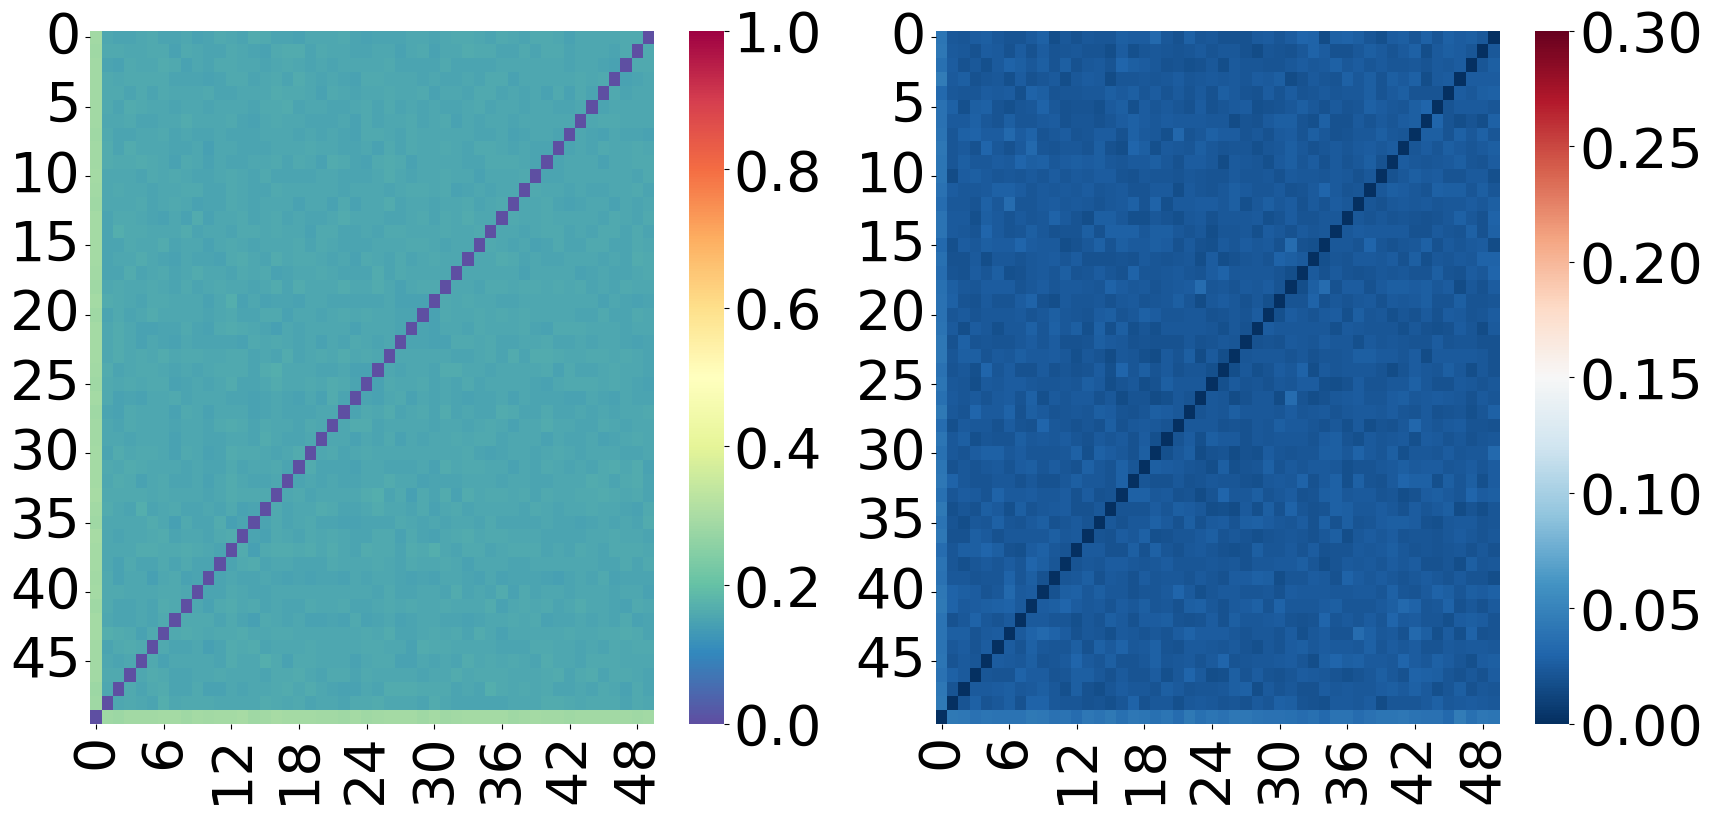

Max STD  0.1755023070475372


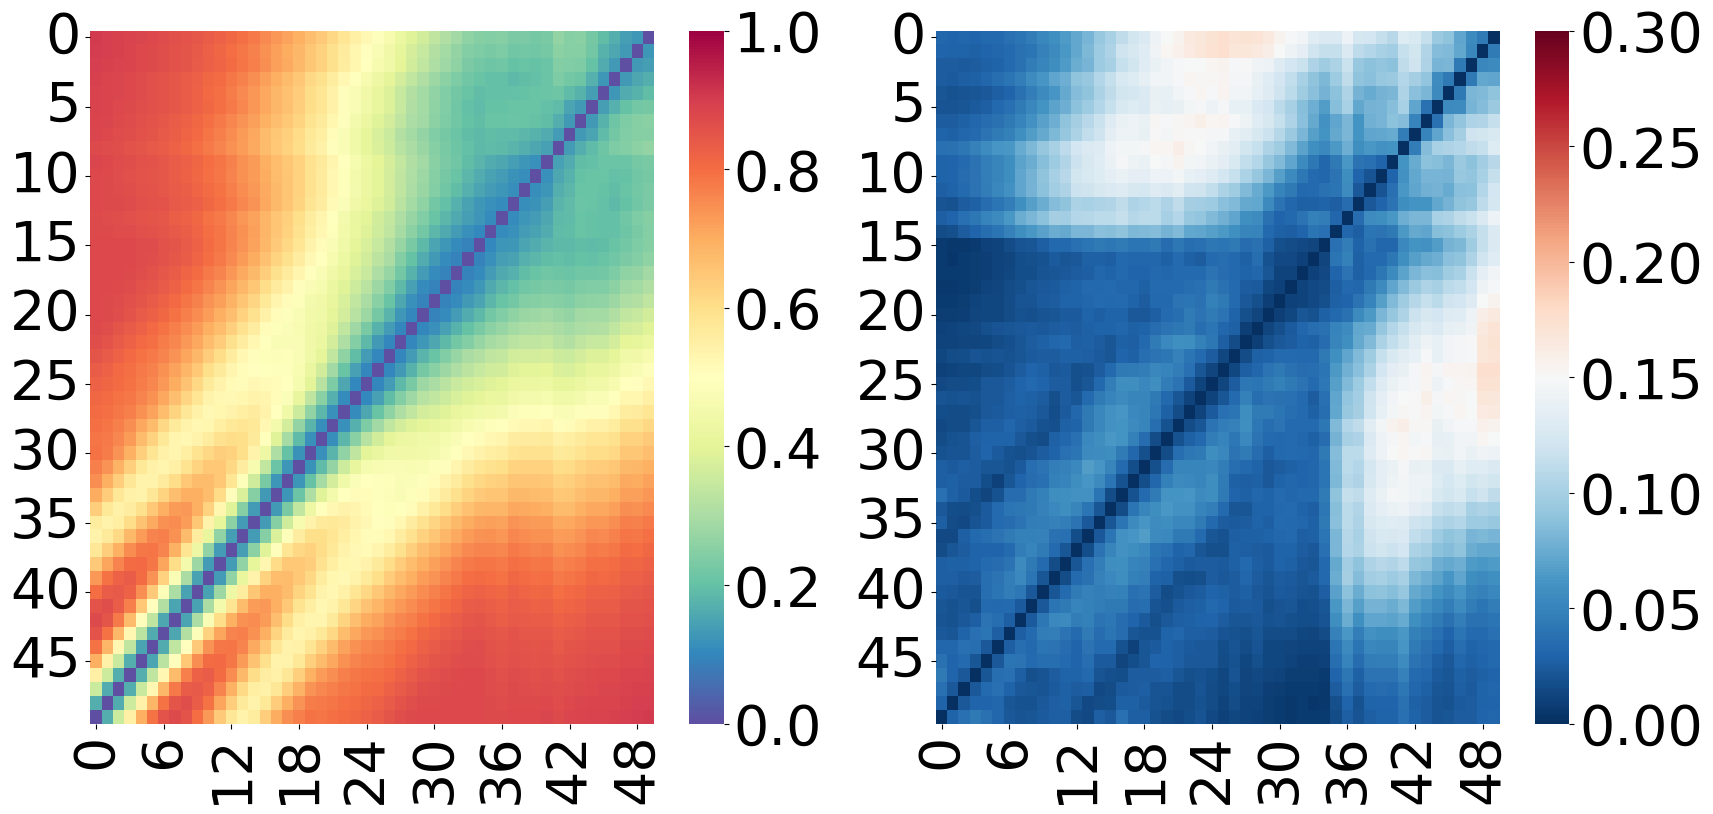

Max STD  0.03273572719053117


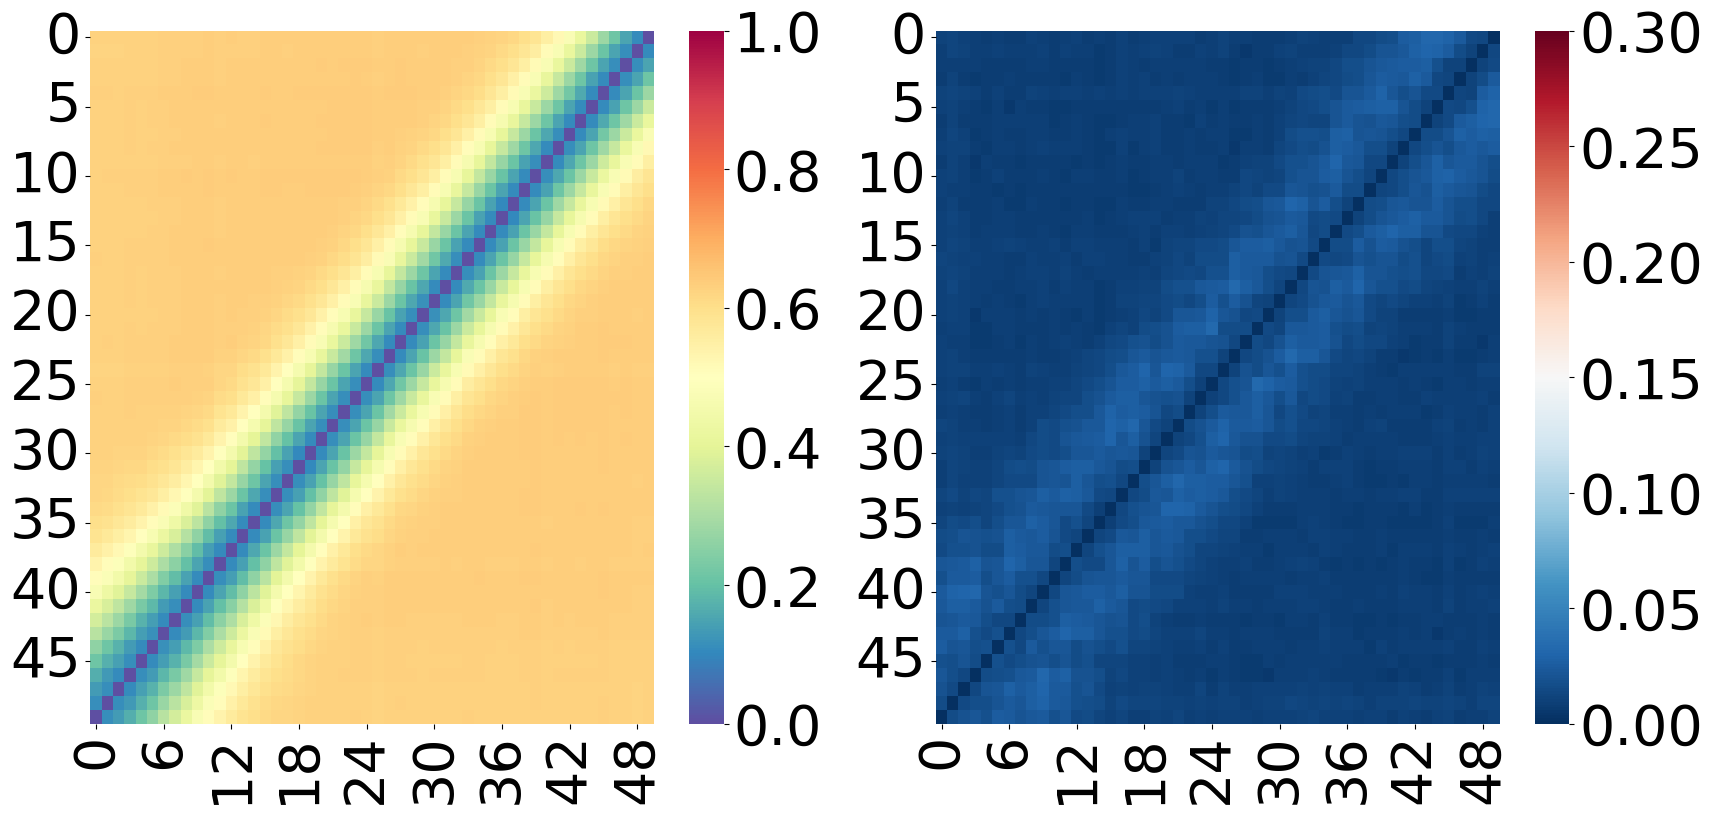

Max STD  0.09934156902331473


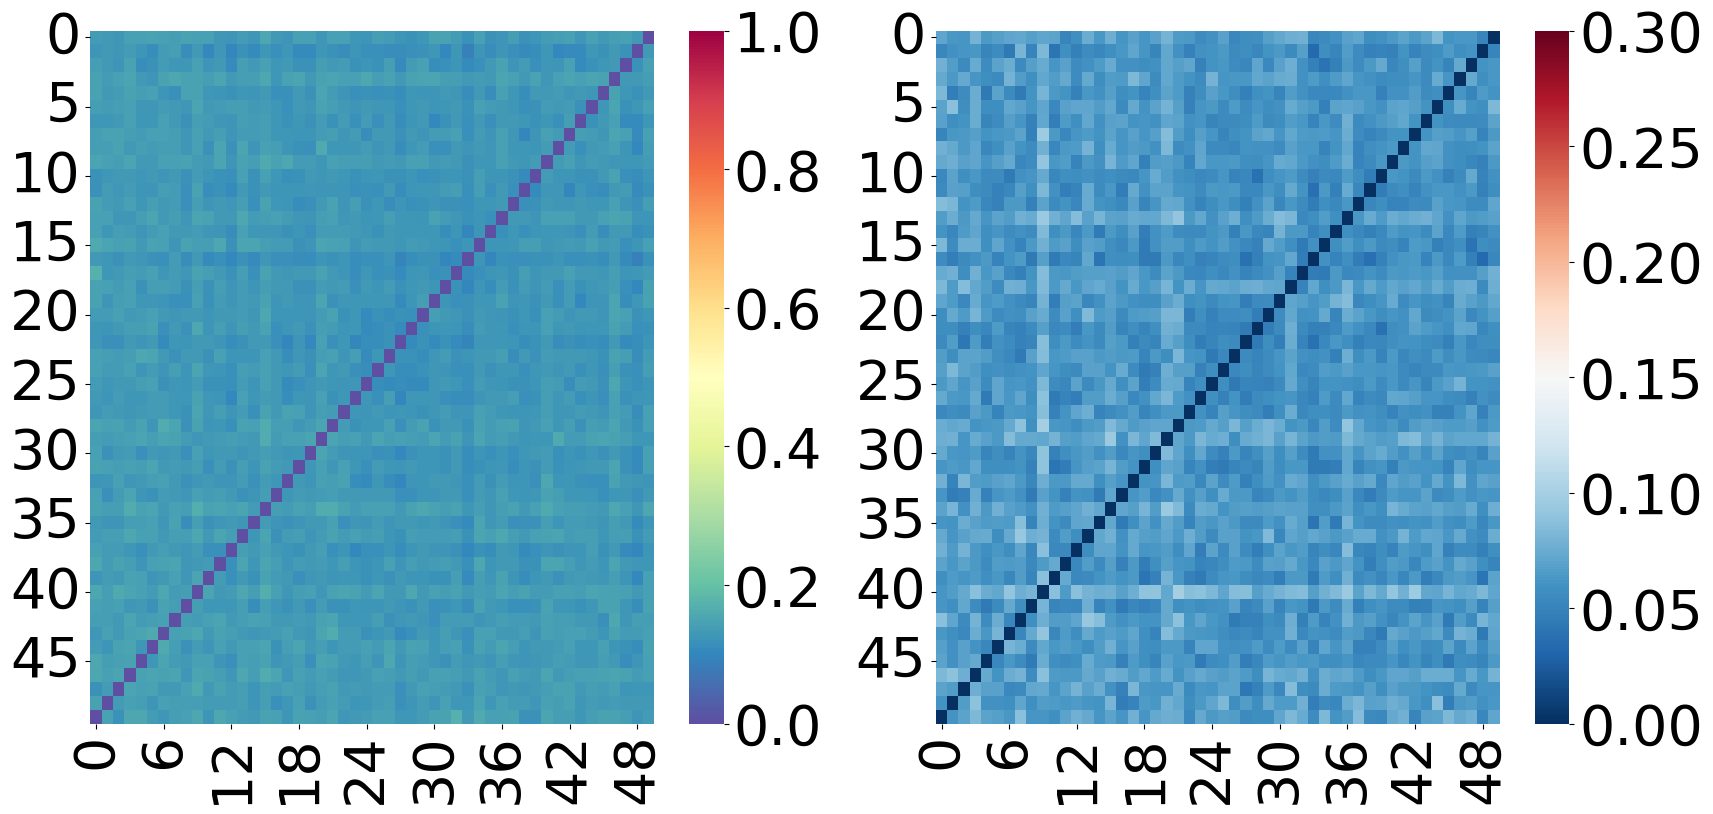

Max STD  0.14348966561449963


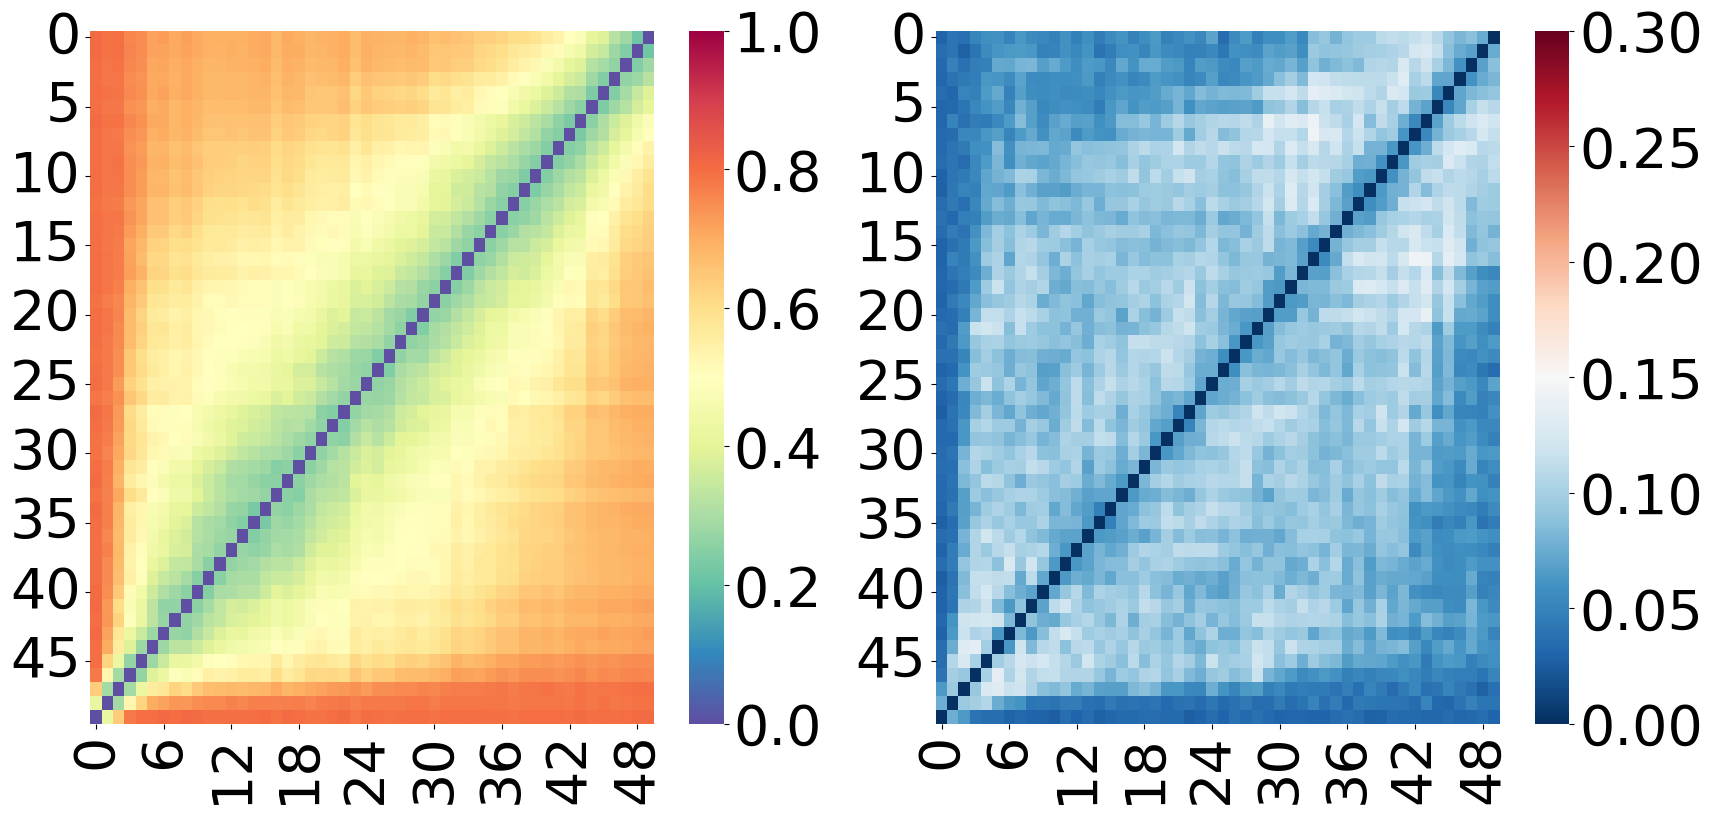

In [20]:
test_algo_df = pd.DataFrame()
num_tws = num_iter//tw_size
for a in algorithms:
    line = []
    f_df = alg_dataframe_pd[alg_dataframe_pd.Algorithm==a]['PD'].values
    for e in range(0, num_tws*num_tws*num_executions, num_tws*num_tws):
        line.append(f_df[e:e+(num_tws*num_tws)])
    fig, axs = plt.subplots(ncols=2, figsize=(20, 9))
    mean_d = np.mean(line, axis=0)
    std_d = np.std(line, axis=0)
    sns.heatmap(np.reshape(mean_d, (num_tws, num_tws)), ax=axs[0], vmin=0, vmax=1, cmap=plt.cm.Spectral_r)
    sns.heatmap(np.reshape(std_d, (num_tws, num_tws)), ax=axs[1], vmin=0, vmax=0.3, cmap=plt.cm.RdBu_r)
    print('Max STD ', max(std_d))
    plt.show()